<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Contraceptive_Project_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Factors explaining the intention to use a modern contraceptive Method**

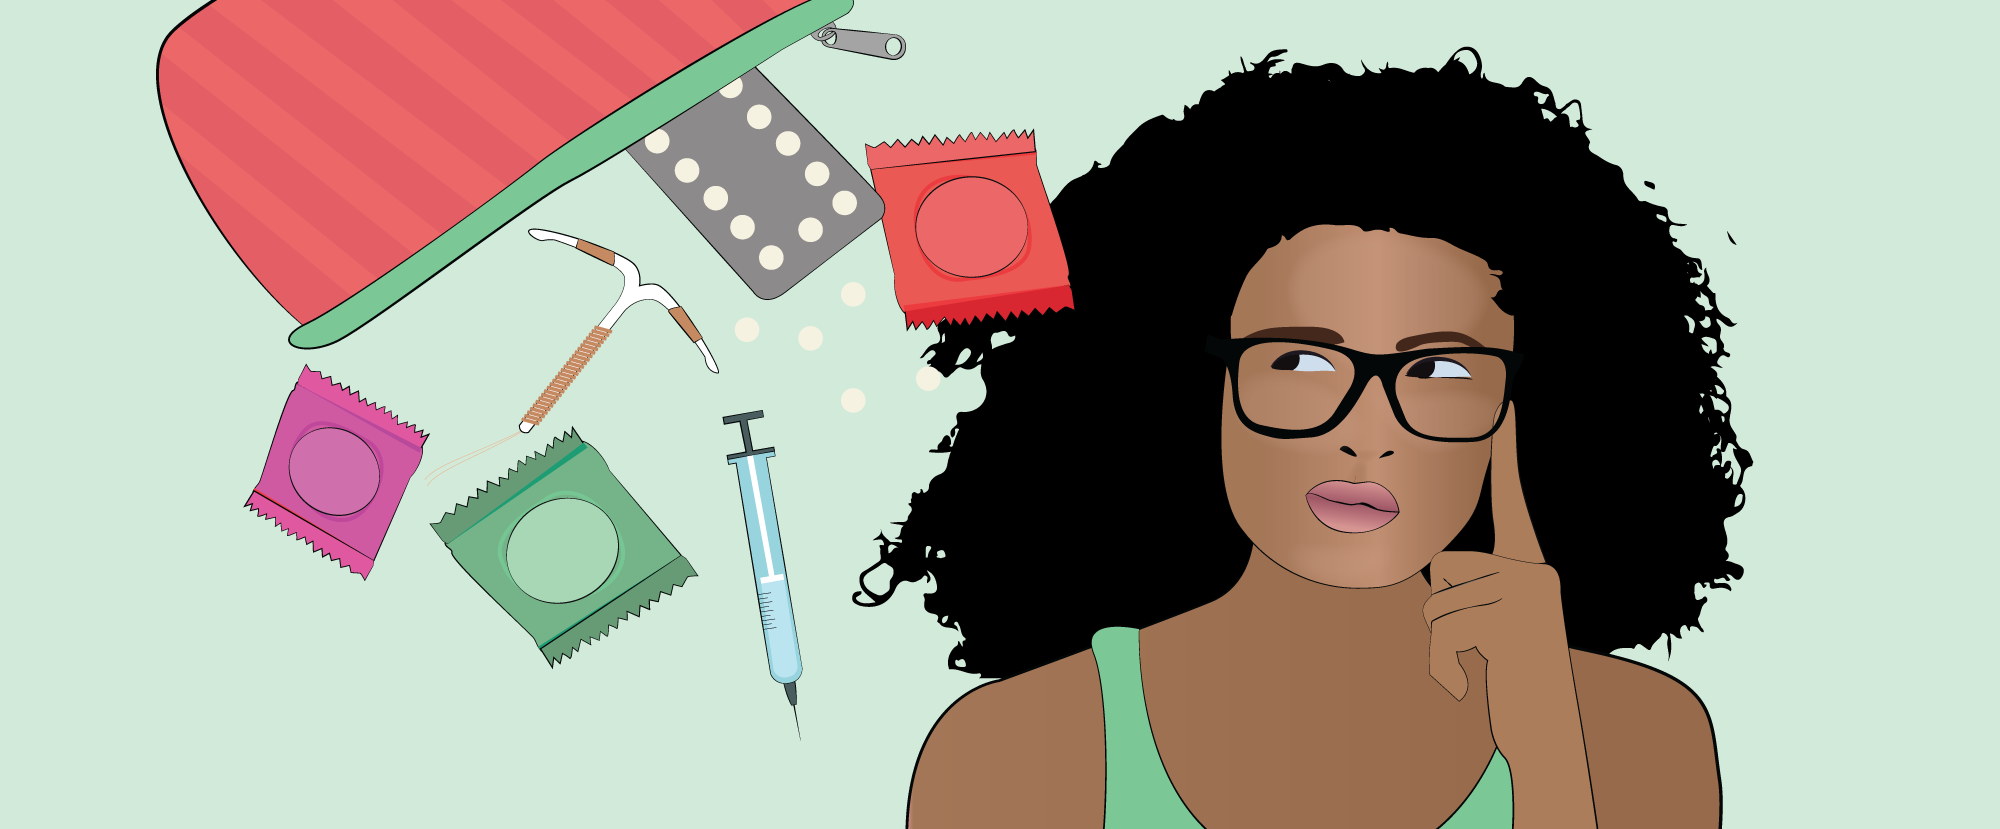

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

**To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**

**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.

# Hypothesis: Research Question ?
 What is the question that you would like to answer in order to make a decision.

**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Explication
**1878 0bservations and 24 variables has been choosen for in this process**


**The features variables are :**

* Region :


* Type_of_place_of_residence:



* Highest_educational_level:



* Religion:



* Wealth_index_combined:


* Knowledge_of_ovulatory_cycle:


* Current_contraceptive_method:


* Current_use_by_method_type:


* At_health_facility_told_of_family_planning:

* Contraception_is_woman_s_business_man_should_not_worry:


* Women_who_use_contraception_become_promiscuous:


 * Husband_partner_s_occupation:


 * Respondent_currently_working:


 * Respondent_earns_more_than_husband_partner:


 * Total_lifetime_number_of_sex_partners:


 * Years_since_first_cohabitation:


 * Age_at_first_cohabitation:


 * Number_of_living_children:


 * Age_of_respondent_at_1st_birth:


 * Husband_partner_s_age:


 * Respondent_s_current_age:


 * Number_of_household_members:


 * Number_of_children_5_and_under_in_household:


**The target variable is :**
 *  **Unmet need for contraception** :

 
 In terms of analysis, the objective is to verify the following hypotheses: The married woman’s choice of a modern contraceptive method (MCM) is characterized by:

* The educational level (+)
* Number of children (+)
* Number of partners (+)
* Woman's age (-)
* Husband's age (-)
* Professional activity (-)
* Sexual activity (+)
* Religion (Ca)
* Number of household members (+)
* Perception about contraception (+)
* Fertility preference (-)




# I. PACKAGES

In [283]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

# II. DATA CLEANING

## 1. LOAD DATA

In [284]:
df = pd.read_excel("contraceptive.xlsx")

In [285]:
# display fisrt five rows
df.head()

,Respondent's current age,Region,Type of place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Number of trips in last 12 months,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Total children ever born,Age of most recent child,Heard family planning on radio last few months,Heard family planning on TV last few months,Visited health facility last 12 months,"Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Covered by health insurance,More than once unions,Age at first cohabitation,Age at first sex,Recent sexual activity,Husband's desire for children,Unmet need for contraception,Husband/partner's education level,Husband/partner's occupation,Respondent's occupation,Husband/partner's age,Person who usually decides on respondent's health care,Total lifetime number of sex partners,Contraceptive use and intention
0,31,Sud,Rural,Primary,Catholic,4,2,1,Middle,3,19.00,After period ended,3,1.00,No,No,Yes,Disagree,Disagree,No,0,27,15,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2,Non_user _intends to use later
1,38,Sud,Rural,Higher,Catholic,5,1,0,Middle,1,31.00,Middle of the cycle,3,3.00,No,No,Yes,Agree,Disagree,No,0,29,18,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2,Using_modern_method
2,38,Sud,Rural,Secondary,Protestant,6,1,1,Middle,1,28.00,After period ended,4,1.00,No,No,Yes,Disagree,Disagree,No,0,28,24,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2,Using_modern_method
3,35,Sud,Rural,Secondary,Catholic,6,0,0,Middle,0,23.00,After period ended,4,7.00,No,No,Yes,Disagree,Disagree,No,0,22,18,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2,Using_modern_method
4,37,Sud,Rural,Secondary,Catholic,7,1,1,Poorer,1,18.00,After period ended,5,3.00,No,No,No,Agree,Agree,No,0,18,17,Active in last 4 weeks,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2,Using_modern_method


In [286]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Number_of_trips_in_last_12_months', 'Wealth_index_combined', 'Births_in_last_five_years',
       'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle', 'Total_children_ever_born', 'Age_of_most_recent_child',
       'Heard_family_planning_on_radio_last_few_months', 'Heard_family_planning_on_TV_last_few_months', 'Visited_health_facility_last_12_months',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Covered_by_health_insurance',
       'More_than_once_unions', 'Age_at_first_cohabitation', 'Age_at_first_sex', 'Recent_sexual_activity', 'Husband_s_desire_for_children',
       'Unmet_need_for_contraception', 'Husband_partner_s_education_level', 'Husband_partner_s_occupation', 'Respondent_s_occupation',
       'Husb

In [287]:
# how they appear
df.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners,Contraceptive_use_and_intention
0,31,Sud,Rural,Primary,Catholic,4,2,1,Middle,3,19.00,After period ended,3,1.00,No,No,Yes,Disagree,Disagree,No,0,27,15,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2,Non_user _intends to use later
1,38,Sud,Rural,Higher,Catholic,5,1,0,Middle,1,31.00,Middle of the cycle,3,3.00,No,No,Yes,Agree,Disagree,No,0,29,18,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2,Using_modern_method
2,38,Sud,Rural,Secondary,Protestant,6,1,1,Middle,1,28.00,After period ended,4,1.00,No,No,Yes,Disagree,Disagree,No,0,28,24,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2,Using_modern_method
3,35,Sud,Rural,Secondary,Catholic,6,0,0,Middle,0,23.00,After period ended,4,7.00,No,No,Yes,Disagree,Disagree,No,0,22,18,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2,Using_modern_method
4,37,Sud,Rural,Secondary,Catholic,7,1,1,Poorer,1,18.00,After period ended,5,3.00,No,No,No,Agree,Agree,No,0,18,17,Active in last 4 weeks,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2,Using_modern_method


In [288]:
# some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Respondent_s_current_age                                3033 non-null   int64  
 1   Region                                                  3033 non-null   object 
 2   Type_of_place_of_residence                              3033 non-null   object 
 3   Highest_educational_level                               3033 non-null   object 
 4   Religion                                                3033 non-null   object 
 5   Number_of_household_members                             3033 non-null   int64  
 6   Number_of_children_5_and_under_in_household             3033 non-null   int64  
 7   Number_of_trips_in_last_12_months                       3033 non-null   int64  
 8   Wealth_index_combined                 

## **2. OVERVIEW**

In [289]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of observations: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [290]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of observations:  3033

Number of features: 33

Data Features:

Missing values: 353

Unique values:
Respondent_s_current_age                                  34
Region                                                    11
Type_of_place_of_residence                                 2
Highest_educational_level                                  4
Religion                                                   5
                                                          ..
Respondent_s_occupation                                    8
Husband_partner_s_age                                     48
Person_who_usually_decides_on_respondent_s_health_care     3
Total_lifetime_number_of_sex_partners                     13
Contraceptive_use_and_intention                            3
Length: 33, dtype: int64


In [291]:
# Check for duplicated columns
df[df.duplicated()].value_counts()

Series([], dtype: int64)

In [292]:
# Let's see the data types
df.dtypes.value_counts()

object     20
int64      11
float64     2
dtype: int64

In [293]:
# Show categoric variable
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Contraceptive_use_and_intention']

In [294]:
# univariate Analysis
# Calculate absolute frequency and relative frequency for each cateorigal variabl

def prob_category(data,col="Col", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(13,10))
     return result

def generate_barchart(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="black"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="black"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

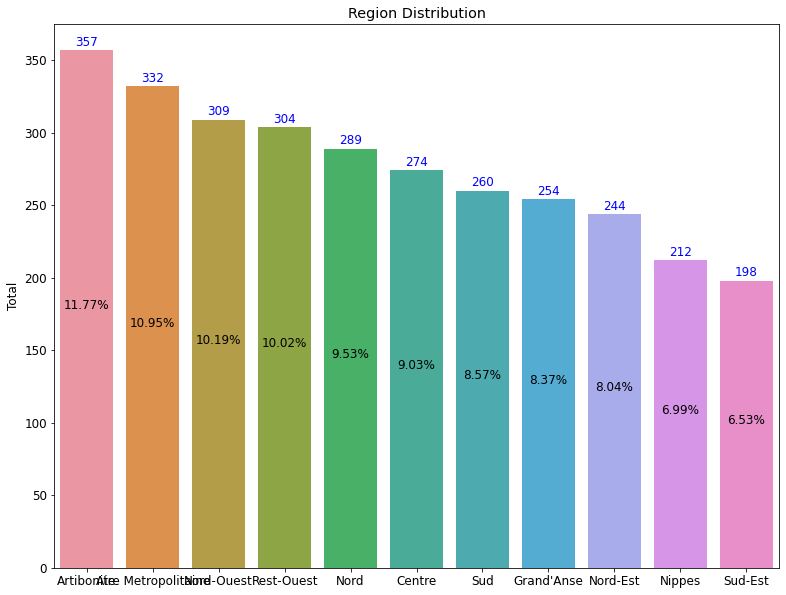

,Total,Percent
Artibonite,357,0.12
Aire Metropolitaine,332,0.11
Nord-Ouest,309,0.10
Rest-Ouest,304,0.10
Nord,289,0.10
Centre,274,0.09
Sud,260,0.09
Grand'Anse,254,0.08
Nord-Est,244,0.08
Nippes,212,0.07


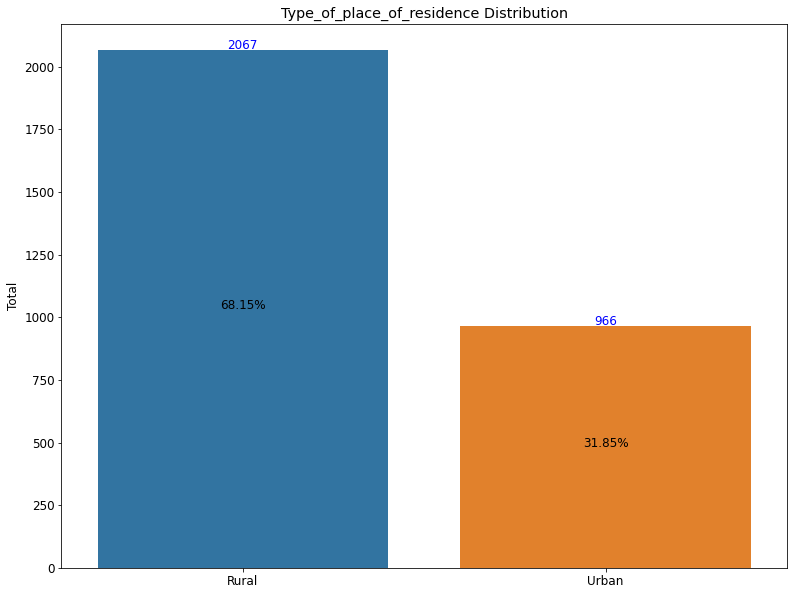

,Total,Percent
Rural,2067,0.68
Urban,966,0.32


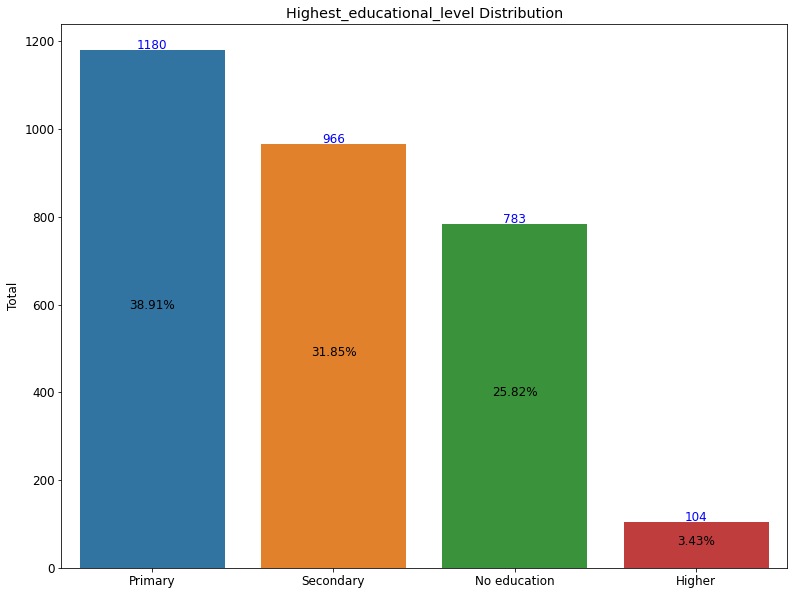

,Total,Percent
Primary,1180,0.39
Secondary,966,0.32
No education,783,0.26
Higher,104,0.03


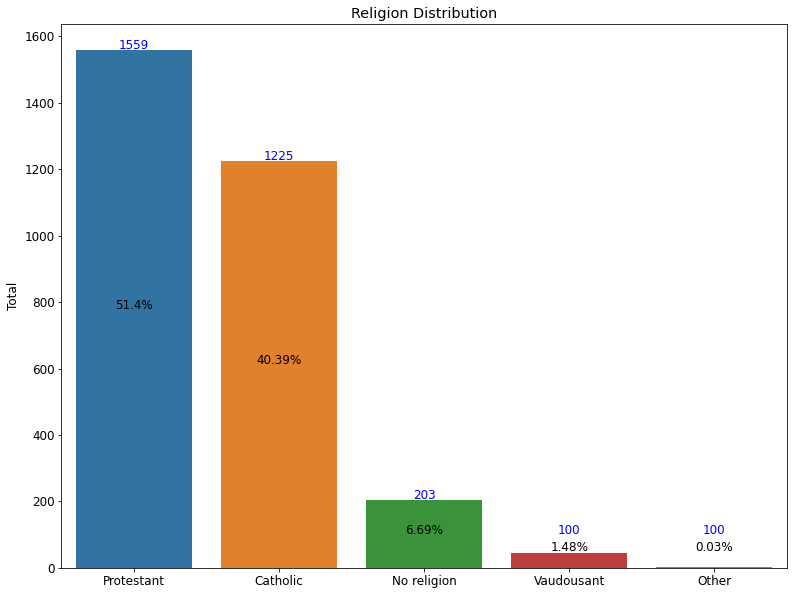

,Total,Percent
Protestant,1559,0.51
Catholic,1225,0.40
No religion,203,0.07
Vaudousant,45,0.01
Other,1,0.00


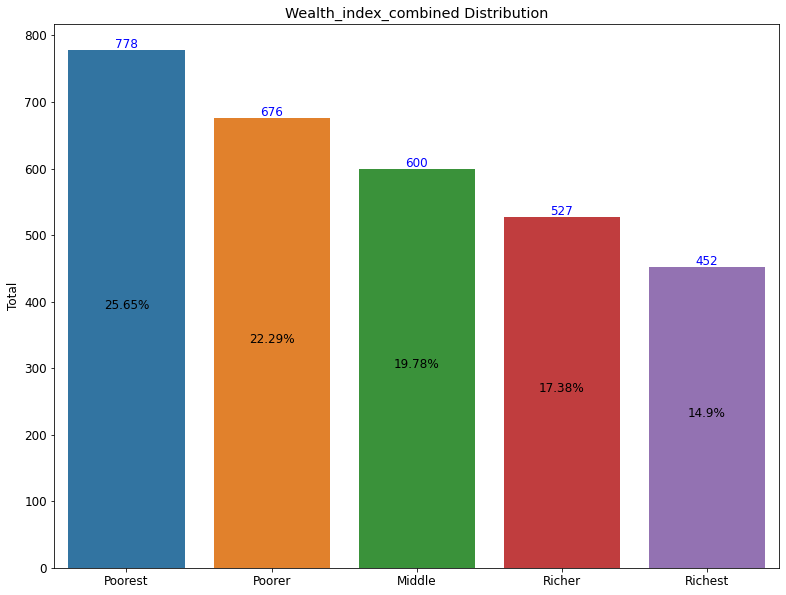

,Total,Percent
Poorest,778,0.26
Poorer,676,0.22
Middle,600,0.20
Richer,527,0.17
Richest,452,0.15


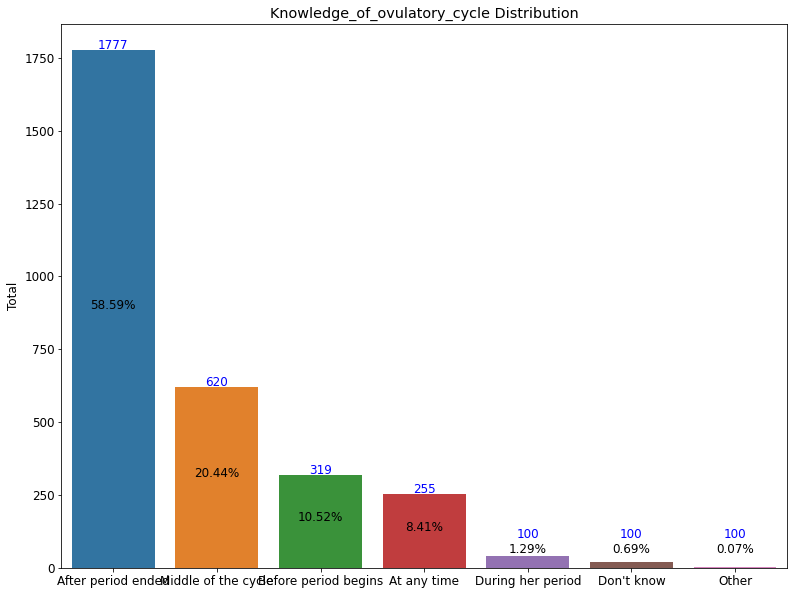

,Total,Percent
After period ended,1777,0.59
Middle of the cycle,620,0.20
Before period begins,319,0.11
At any time,255,0.08
During her period,39,0.01
Don't know,21,0.01
Other,2,0.00


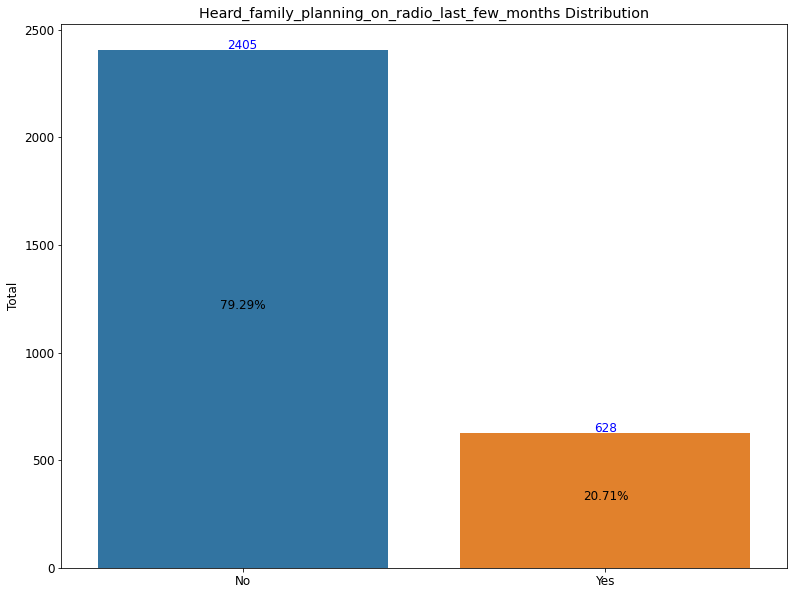

,Total,Percent
No,2405,0.79
Yes,628,0.21


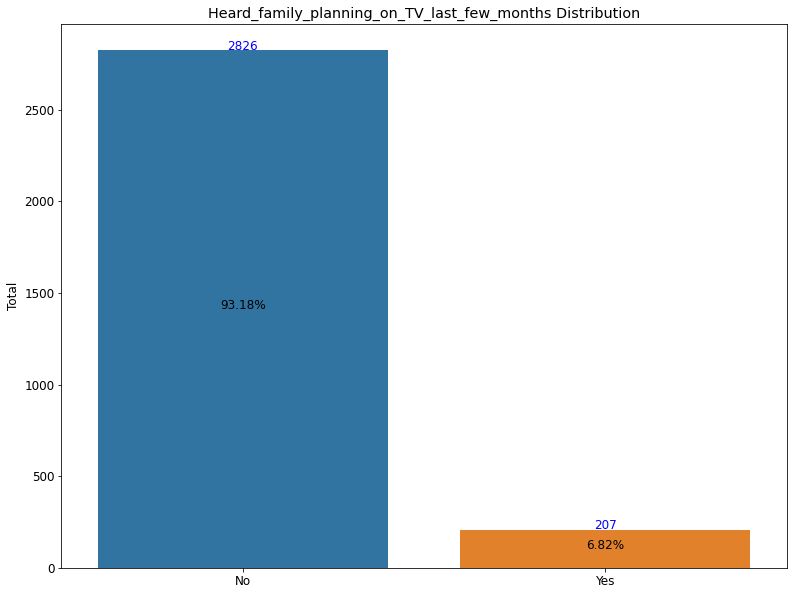

,Total,Percent
No,2826,0.93
Yes,207,0.07


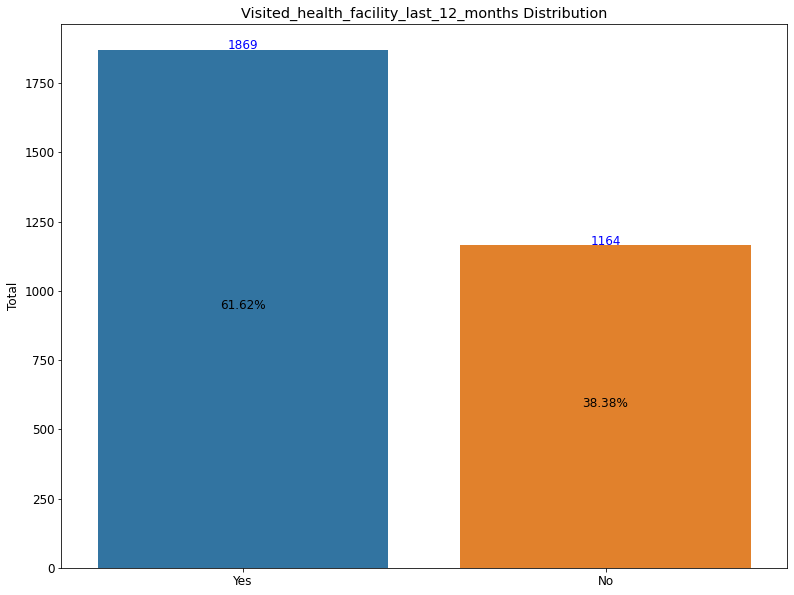

,Total,Percent
Yes,1869,0.62
No,1164,0.38


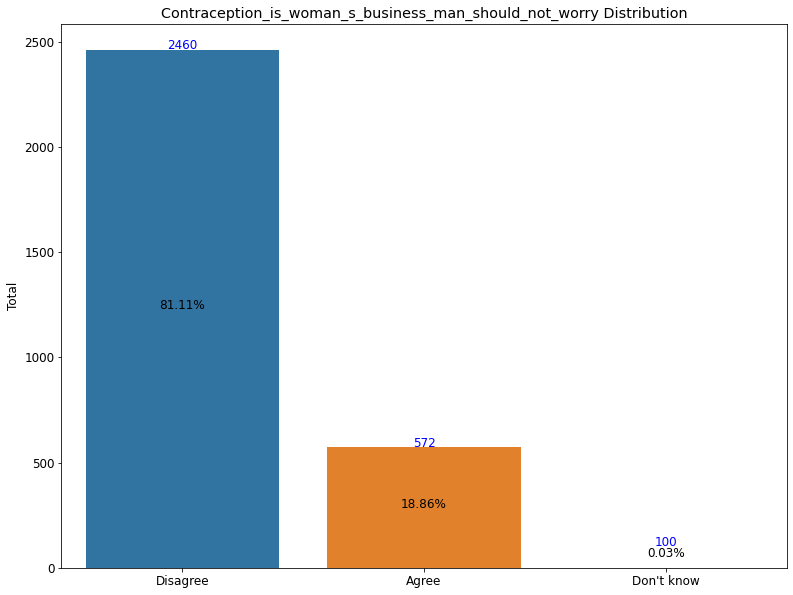

,Total,Percent
Disagree,2460,0.81
Agree,572,0.19
Don't know,1,0.00


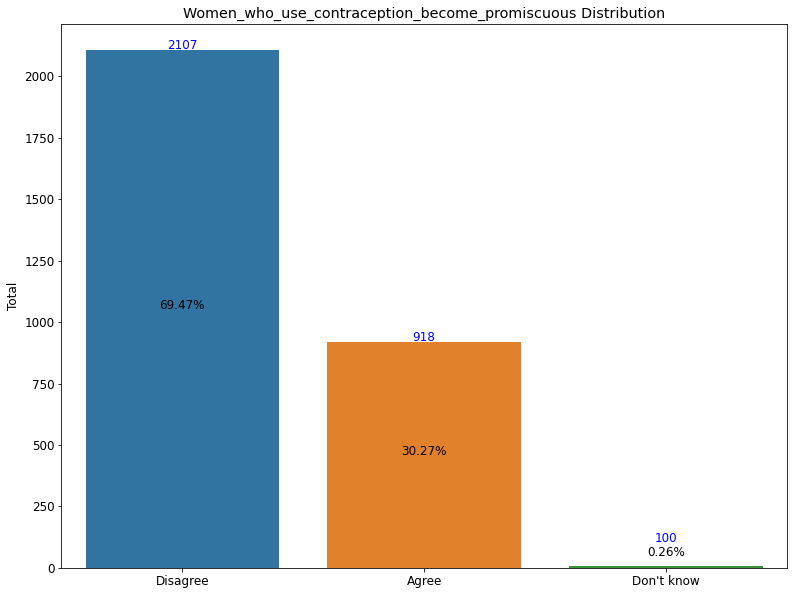

,Total,Percent
Disagree,2107,0.69
Agree,918,0.30
Don't know,8,0.00


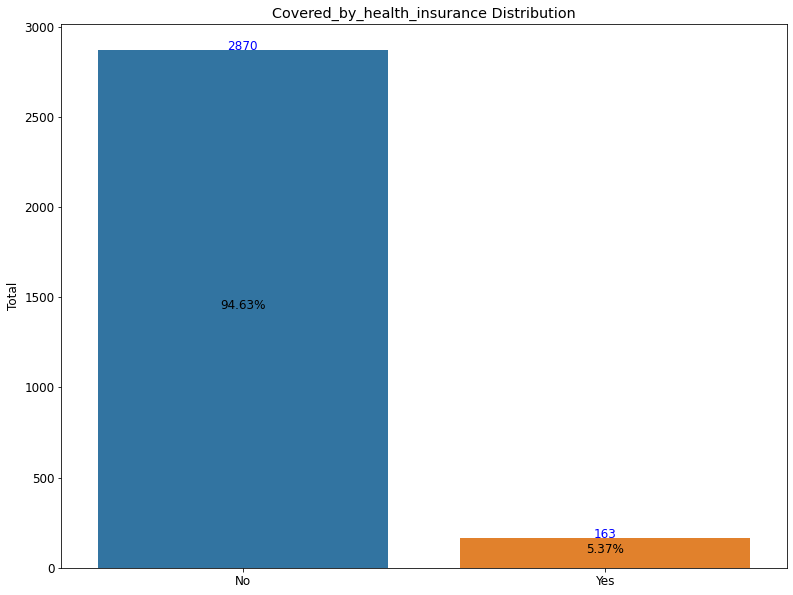

,Total,Percent
No,2870,0.95
Yes,163,0.05


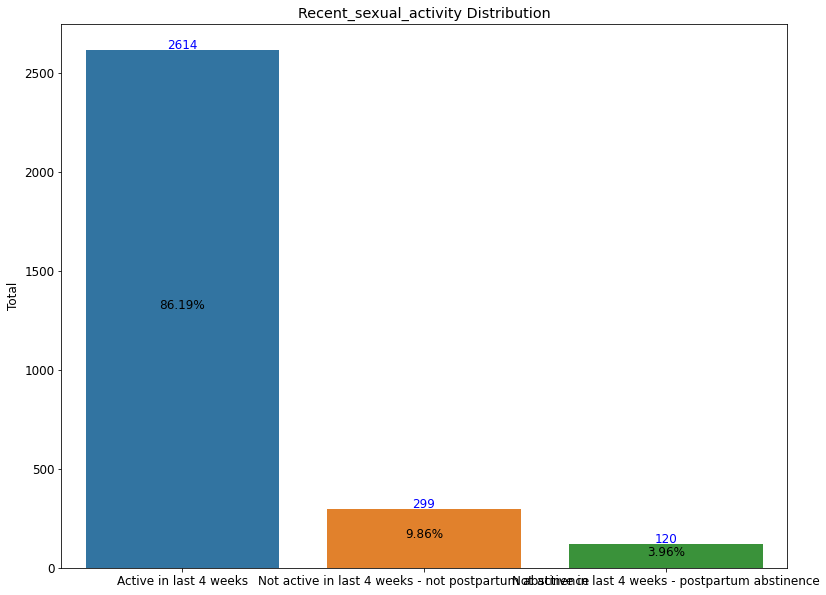

,Total,Percent
Active in last 4 weeks,2614,0.86
Not active in last 4 weeks - not postpartum abstinence,299,0.10
Not active in last 4 weeks - postpartum abstinence,120,0.04


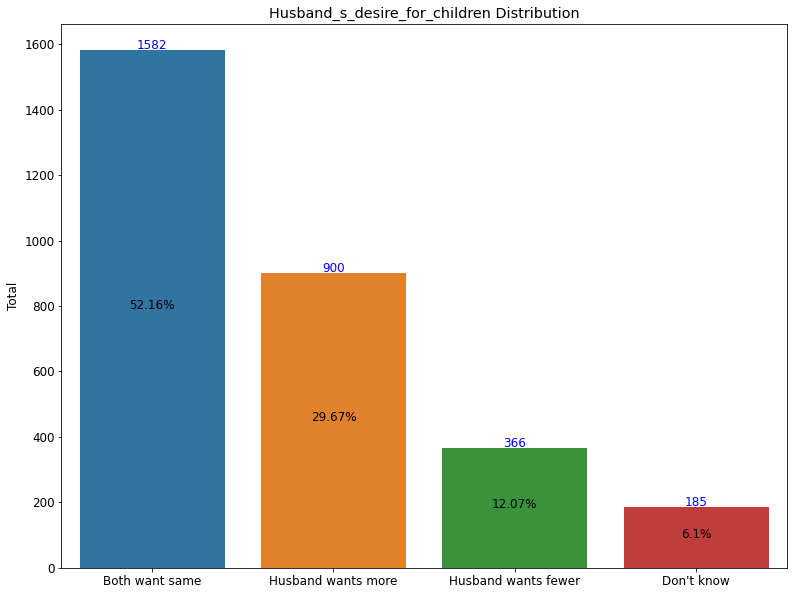

,Total,Percent
Both want same,1582,0.52
Husband wants more,900,0.30
Husband wants fewer,366,0.12
Don't know,185,0.06


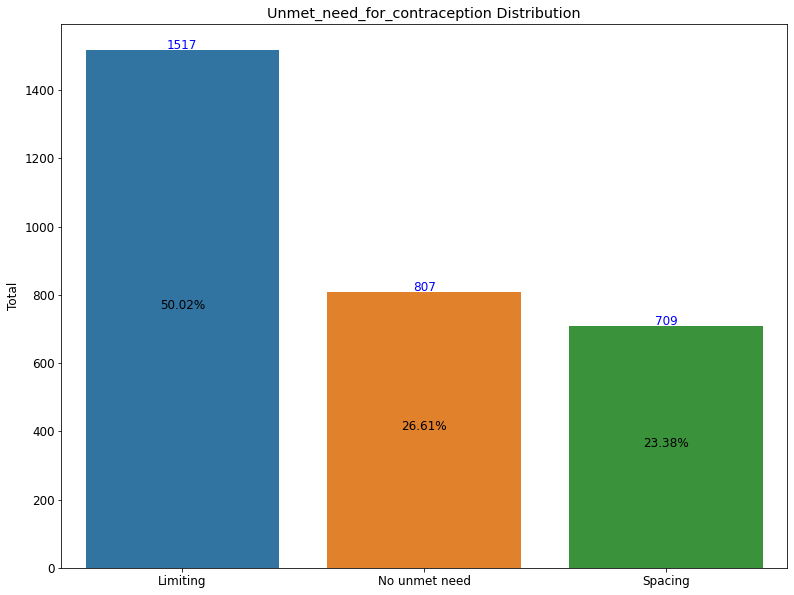

,Total,Percent
Limiting,1517,0.50
No unmet need,807,0.27
Spacing,709,0.23


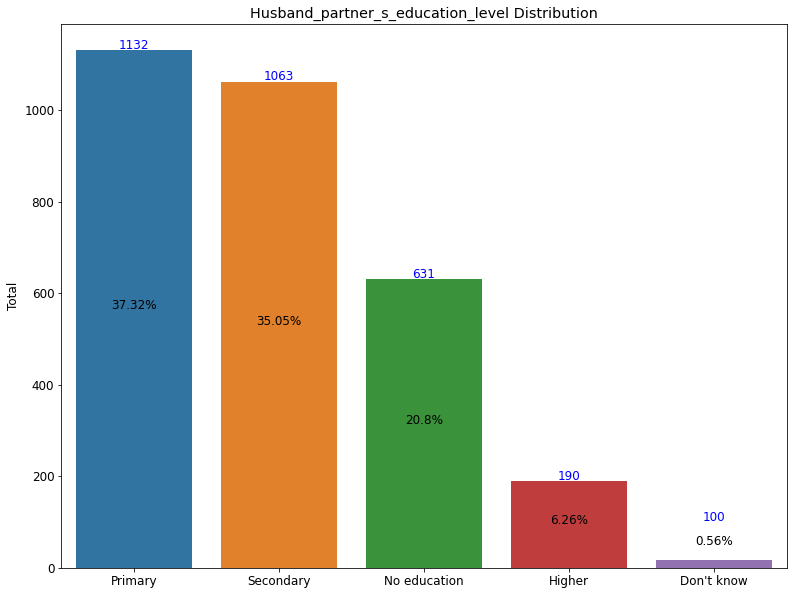

,Total,Percent
Primary,1132,0.37
Secondary,1063,0.35
No education,631,0.21
Higher,190,0.06
Don't know,17,0.01


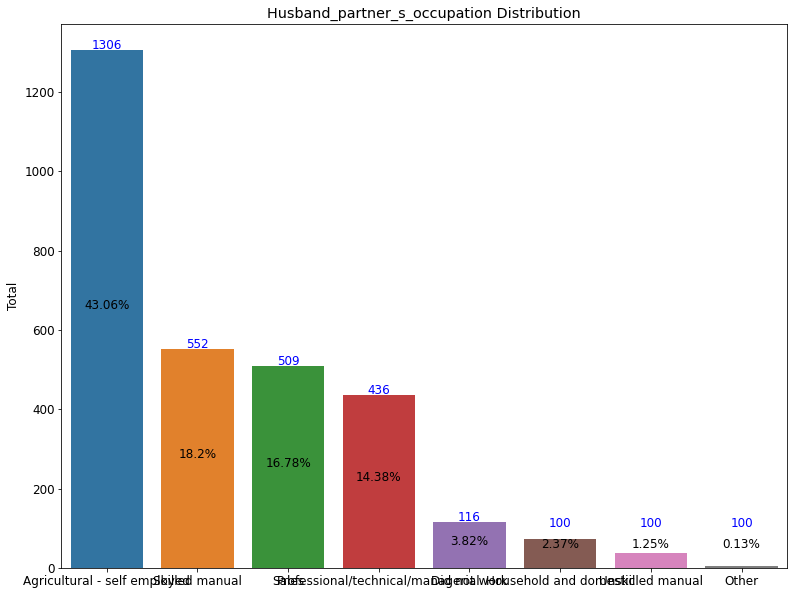

,Total,Percent
Agricultural - self employed,1306,0.43
Skilled manual,552,0.18
Sales,509,0.17
Professional/technical/managerial,436,0.14
Did not work,116,0.04
Household and domestic,72,0.02
Unskilled manual,38,0.01
Other,4,0.00


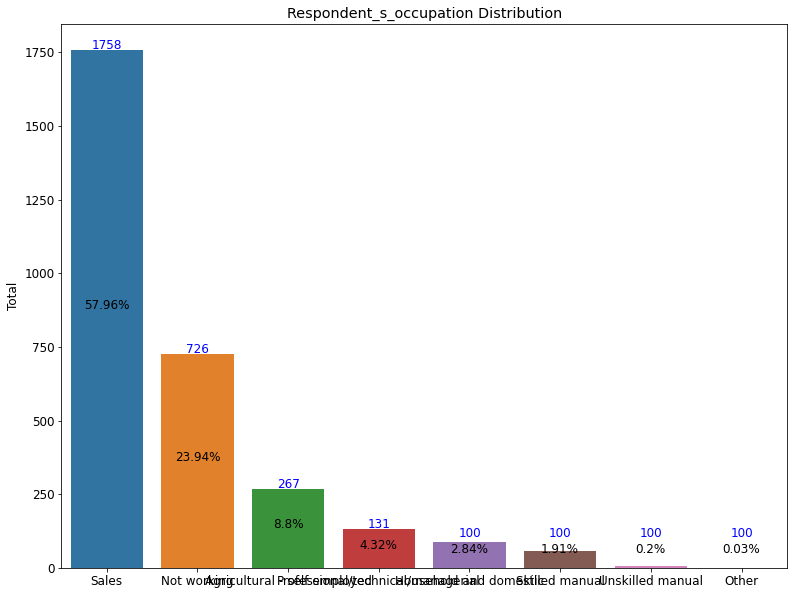

,Total,Percent
Sales,1758,0.58
Not working,726,0.24
Agricultural - self employed,267,0.09
Professional/technical/managerial,131,0.04
Household and domestic,86,0.03
Skilled manual,58,0.02
Unskilled manual,6,0.00
Other,1,0.00


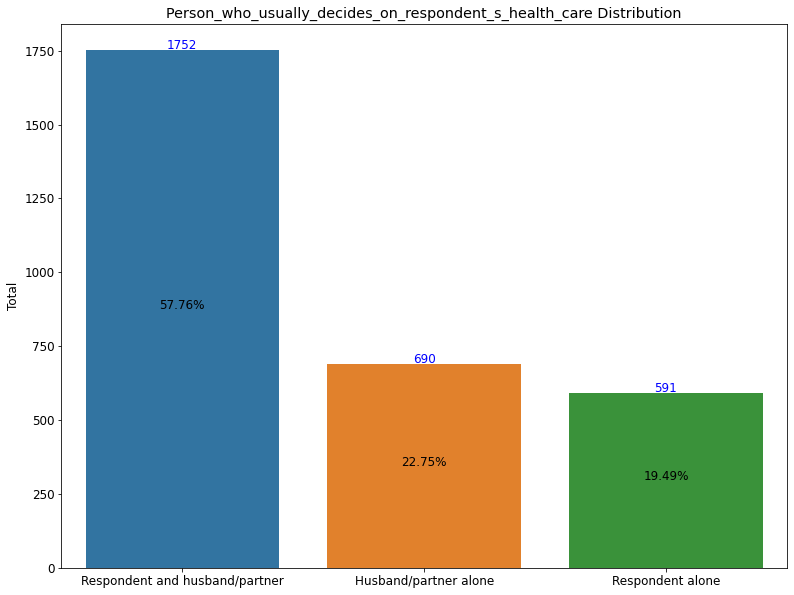

,Total,Percent
Respondent and husband/partner,1752,0.58
Husband/partner alone,690,0.23
Respondent alone,591,0.19


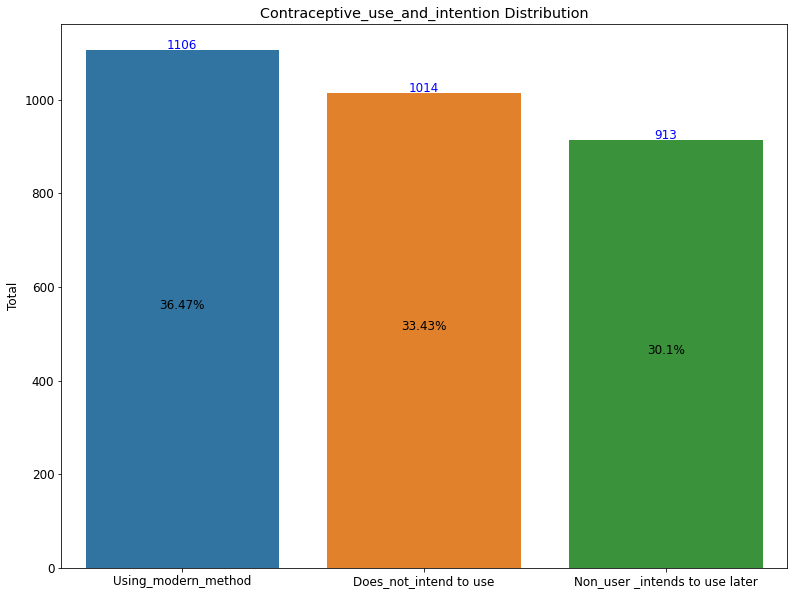

,Total,Percent
Using_modern_method,1106,0.36
Does_not_intend to use,1014,0.33
Non_user _intends to use later,913,0.30


In [295]:
#Show aplot for  categoric succesively
for col in cat_cols:
  result = prob_category(data=df,col=col, abs_value ="Total",rel_value ="Percent", show_plot=True,title=f"{col} Distribution")
  display(result)

###**Deal with NaN value**

In [296]:
#Function to find missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [297]:
# Check missing values
missing = missing_values_table(df)
missing

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_of_most_recent_child,190,6.30
Age_of_respondent_at_1st_birth,163,5.40


In [298]:
# replacing na values in Age_of_most_recent_child
df["Age_of_most_recent_child"].fillna(df['Age_of_most_recent_child'].mean(), inplace = True)

In [299]:
# replacing na values in Age_of_respondent_at_1st_birth
df["Age_of_respondent_at_1st_birth"].fillna(df['Age_of_respondent_at_1st_birth'].mean(), inplace = True)

In [300]:
missing_values_table(df)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


  * **There are 3033 observations and 33 features in this dataset**

**There is :**
  * **No Null values**
  * **No Missing values**
  * **No Duplicated values**

In [301]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

In [302]:
# Display numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

##**ANALYSIS**
**As we can see, This dataset is dominated by the following characteristics:** 


* **The most representative regions of the dataset are**

  * **West (20%) with 50% from the air metropolitan area**
  * **Artibonite (11%)**
  * **Northwest (11%)**

* **Geographics** 
  * **2/3 are from rural areas** 


* **Education**

**97% don't get higher than secondary level**
  * **Primary school (39%)**
  * **Secondary school (32)**
  * **No education (26%)**
  * **Higher (3%)**

* **Type Of Contraceptive Method Used**
  * **About 1/3 used injections contraceptive method**

* **Wealth index**
  * **48% are indexed in a poor household class**

* **Religion**

  * **52% are Prostestant**
  * **42% are Catholic**
  * **6% No Religion**

* **Profession**
  * **46% have their husbands working in agriculture**

In [303]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Contraceptive_use_and_intention"].value_counts(), plot_title="Distribution of married women by modern contraceptive method")

###**Target Transformation**

In [304]:
df['Contraceptive_use_and_intention'].unique()

array(['Non_user _intends to use later', 'Using_modern_method',
       'Does_not_intend to use'], dtype=object)

In [305]:
df['Contraceptive_use_and_intention'].replace({'Does_not_intend to use': 'No', 'Using_modern_method': 'Yes', 'Non_user _intends to use later': 'Yes'}, inplace=True)

##**Comments I**

###**DESCRIPTIVE ANALYSIS**

In [306]:
# Descriptive of numeric variable
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,3033.00,34.14,8.33,16.00,27.00,34.00,41.00,49.00
Number_of_household_members,3033.00,5.59,2.28,2.00,4.00,5.00,7.00,19.00
Number_of_children_5_and_under_in_household,3033.00,1.00,0.95,0.00,0.00,1.00,2.00,7.00
Number_of_trips_in_last_12_months,3033.00,1.29,4.67,0.00,0.00,0.00,1.00,90.00
Births_in_last_five_years,3033.00,0.78,0.81,0.00,0.00,1.00,1.00,5.00
Age_of_respondent_at_1st_birth,3033.00,20.83,4.30,11.00,18.00,20.00,23.00,43.00
Total_children_ever_born,3033.00,4.00,3.16,0.00,2.00,3.00,6.00,43.00
Age_of_most_recent_child,3033.00,4.91,4.85,0.00,1.00,4.00,7.00,30.00
More_than_once_unions,3033.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
Age_at_first_cohabitation,3033.00,21.09,4.93,10.00,18.00,20.00,24.00,46.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f6f0d150>,
      dtype=object)

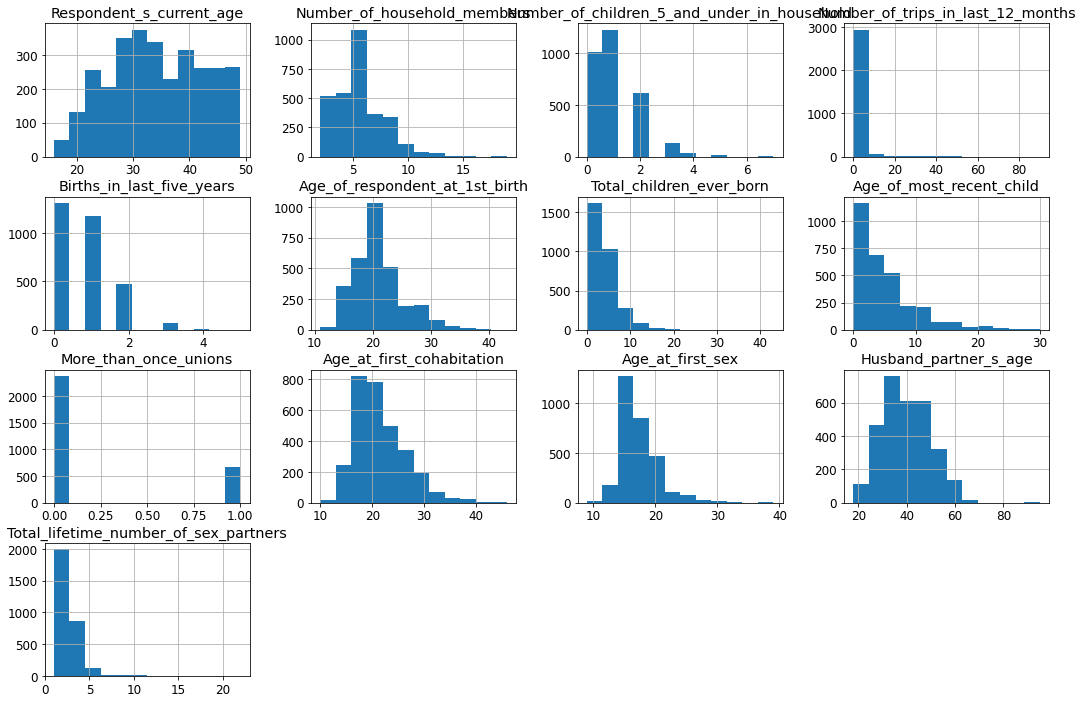

In [307]:
# Let's plot numeric variable
df[num_cols].hist(figsize = (18,12), bins=12)

##**Numeric variable Analysis**
**Apart from the variable Total_lifetime_number_of_sex_partners**.

**The variables:**
* Respondent_s_current_age
* Number_of_household_members
* Number_of_children_5_and_under_in_household',
* Age_of_respondent_at_1st_birth
* Number_of_living_children
* Age_at_first_cohabitation
* Years_since_first_cohabitation
* Husband_partner_s_age
 
**appear to be normally distributed but a chapiro test is required to better assess this assumption**.

In [308]:
# describe of non numeric variables
include =['object'] 
df.describe( include = include).T

,count,unique,top,freq
Region,3033,11,Artibonite,357
Type_of_place_of_residence,3033,2,Rural,2067
Highest_educational_level,3033,4,Primary,1180
Religion,3033,5,Protestant,1559
Wealth_index_combined,3033,5,Poorest,778
Knowledge_of_ovulatory_cycle,3033,7,After period ended,1777
Heard_family_planning_on_radio_last_few_months,3033,2,No,2405
Heard_family_planning_on_TV_last_few_months,3033,2,No,2826
Visited_health_facility_last_12_months,3033,2,Yes,1869
Contraception_is_woman_s_business_man_should_not_worry,3033,3,Disagree,2460


In [309]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Contraceptive_use_and_intention"].value_counts(), plot_title="Distribution by unmet need for contraceptive method")

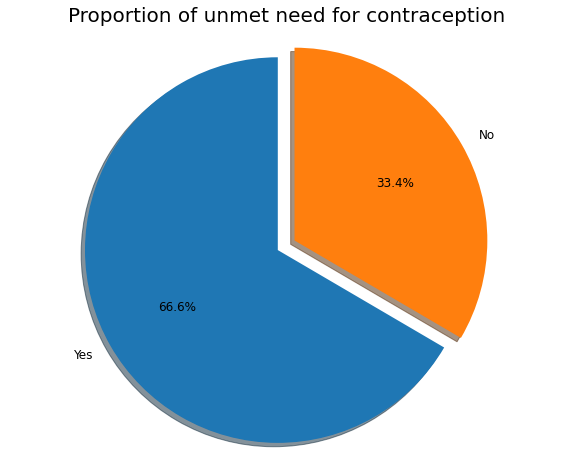

In [310]:
labels = 'Yes', 'No'
sizes = [df.Contraceptive_use_and_intention[df['Contraceptive_use_and_intention']=='Yes'].count(), df.Contraceptive_use_and_intention[df['Contraceptive_use_and_intention']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of unmet need for contraception", size = 20)
plt.show()

In [311]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Recent_sexual_activity"].value_counts(), plot_title="Distribution by modern contraceptive method")

In [312]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Knowledge_of_ovulatory_cycle"].value_counts(), plot_title="Distribution by modern contraceptive method")

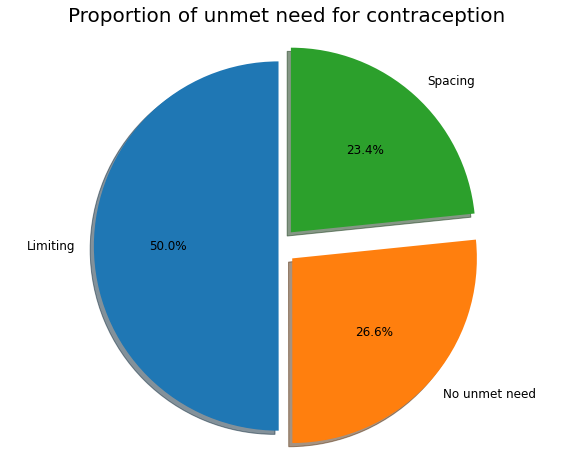

In [313]:
labels = 'Limiting', 'No unmet need', 'Spacing'
sizes = [df.Unmet_need_for_contraception[df['Unmet_need_for_contraception']=='Limiting'].count(), df.Unmet_need_for_contraception[df['Unmet_need_for_contraception']=='No unmet need'].count(), df.Unmet_need_for_contraception[df['Unmet_need_for_contraception']=='Spacing'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of unmet need for contraception", size = 20)
plt.show()

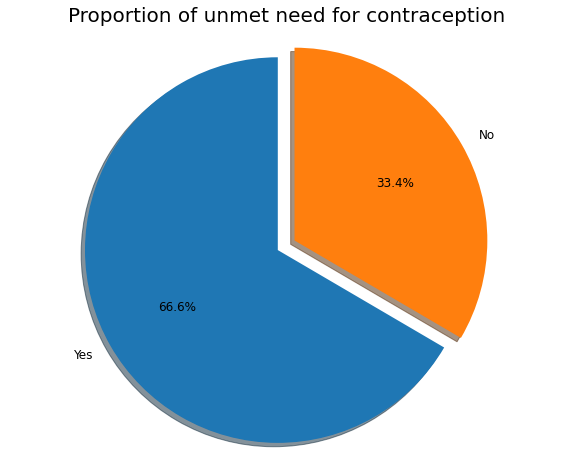

In [314]:
labels = 'Yes', 'No'
sizes = [df.Contraceptive_use_and_intention[df['Contraceptive_use_and_intention']=='Yes'].count(), df.Unmet_need_for_contraception[df['Contraceptive_use_and_intention']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of unmet need for contraception", size = 20)
plt.show()

##**DATA TRANSFORMATION**

##**For numeric variable transformation**

In [315]:
# categorical function to transform numeric columns

''' This function is for age numeric transformation'''
def cat_age(x, errors = "coerce"):
  if x <=17:
    return 'Mineur'
  if 18 <= x <= 31:
    return '18_31'
  if x > 32:
    return 'More_32'

''' This function is for members numeric transformation '''
def cat_memb(x, errors = "coerce"):
  if x < 4 :
    return 'Minus_than_4'
  if 4 <= x < 8:
    return '4_8'
  if x >= 8:
    return 'More_than_8'

'''This function is for Total lifetime partners numeric transformation'''
def cat_lifetime(x, errors = "coerce"):
  if x < 3:
    return 'Minus_than_3'
  if 3 <= x < 8:
    return '3_8'
  if x >= 8:
    return 'More_than_8'

''' This function is for age numeric transformation '''
def cat_child(x, errors = "coerce"):
  if x==0:
    return 'No_child'
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2_4'
  if x >= 4:
    return 'More_than_4'

''' This function is for age at first birth numeric transformation '''
def cat_agebirth(x, errors = "coerce"):
  if x==0:
    return 'No_child'
  if 0 < x < 18:
    return 'Mineur'
  if 18 <= x < 25:
    return '18_25'
  if x >= 25:
    return 'More_than_25'

''' This function is for number of travel numeric transformation '''

def cat_travel(x, errors = "coerce"):
  if x==0:
    return 'No_travel'
  if 0 < x < 24:
    return 'Two_by_month'
  if 24 <= x < 48:
    return 'Four_by_month'
  if x >= 48:
    return 'More_than_four'

''' This function is for living children numeric transformation '''

def cat_livingchild(x, errors = "coerce"):
  if x==0:
    return 'No_child'
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

  ''' This function is for age of first child numeric transformation '''
def cat_agefisrtchild(x, errors = "coerce"):
  if x==0:
    return 'No_child'
  if 0 < x <= 17:
    return 'Mineur'
  if x>=18:
    return 'majeur'

##**For occupation variable**

In [316]:
df['Respondent_s_occupation'].replace({'Sales': 'Sales/Agricultural/self_employed','Agricultural - self employed': 'Sales/Agricultural/self_employed', 'Skilled manual': 'Other', 'Unskilled manual': 'Other', 'Household and domestic':'Other'}, inplace=True)

In [317]:
df['Husband_partner_s_occupation'].replace({'Sales': 'Sales/Agricultural/self_employed', 'Agricultural - self employed':'Sales/Agricultural/self_employed','Skilled manual':'Professional/technical/managerial', 'Unskilled manual': 'Other', 'Did not work': 'Not working', 'Household and domestic':'Other'}, inplace=True)

In [318]:
# df['Husband_partner_s_occupation'] = pd.where(df['Husband_partner_s_occupation'] == 'Professional/technical/managerial', 'Professional/technical/managerial', 'Other')

##**Copy of the Dataset**

In [319]:
unmet=df.copy(deep=True)
method=df.copy(deep=True)

In [320]:
#df['Total_lifetime_number_of_sex_partners']=meancol(df.Total_lifetime_number_of_sex_partners)
#df['Total_lifetime_number_of_sex_partners']

In [321]:
#df['Total_lifetime_number_of_sex_partners'].value_counts()

##**Apply Transformation function**

In [322]:
unmet['Respondent_s_current_age']=unmet['Respondent_s_current_age'].apply(cat_age)
unmet['Number_of_household_members']=unmet['Number_of_household_members'].apply(cat_memb)
unmet['Total_lifetime_number_of_sex_partners']=unmet['Total_lifetime_number_of_sex_partners'].apply(cat_lifetime)
unmet['Number_of_children_5_and_under_in_household']=unmet['Number_of_children_5_and_under_in_household'].apply(cat_child)
unmet['Age_of_respondent_at_1st_birth']=unmet['Age_of_respondent_at_1st_birth'].apply(cat_agebirth)
unmet['Total_children_ever_born']=unmet['Total_children_ever_born'].apply(cat_livingchild)
unmet['Number_of_trips_in_last_12_months']=unmet['Number_of_trips_in_last_12_months'].apply(cat_travel)
unmet['Births_in_last_five_years']=unmet['Births_in_last_five_years'].apply(cat_livingchild)
unmet['Age_of_most_recent_child']=unmet['Age_of_most_recent_child'].apply(cat_agefisrtchild)
unmet['Age_at_first_cohabitation']=unmet['Age_at_first_cohabitation'].apply(cat_age)
unmet['Age_at_first_sex']=unmet['Age_at_first_sex'].apply(cat_age)
unmet['Husband_partner_s_age']=unmet['Husband_partner_s_age'].apply(cat_age)
unmet.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners,Contraceptive_use_and_intention
0,18_31,Sud,Rural,Primary,Catholic,4_8,2_4,Two_by_month,Middle,2-4,18_25,After period ended,2-4,Mineur,No,No,Yes,Disagree,Disagree,No,0,18_31,Mineur,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales/Agricultural/self_employed,18_31,Husband/partner alone,Minus_than_3,Yes
1,More_32,Sud,Rural,Higher,Catholic,4_8,Minus_than_2,No_travel,Middle,Minus_than_2,More_than_25,Middle of the cycle,2-4,Mineur,No,No,Yes,Agree,Disagree,No,0,18_31,18_31,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,More_32,Respondent and husband/partner,Minus_than_3,Yes
2,More_32,Sud,Rural,Secondary,Protestant,4_8,Minus_than_2,Two_by_month,Middle,Minus_than_2,More_than_25,After period ended,More_than_4,Mineur,No,No,Yes,Disagree,Disagree,No,0,18_31,18_31,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,More_32,Husband/partner alone,Minus_than_3,Yes
3,More_32,Sud,Rural,Secondary,Catholic,4_8,No_child,No_travel,Middle,No_child,18_25,After period ended,More_than_4,Mineur,No,No,Yes,Disagree,Disagree,No,0,18_31,18_31,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Professional/technical/managerial,Sales/Agricultural/self_employed,More_32,Husband/partner alone,Minus_than_3,Yes
4,More_32,Sud,Rural,Secondary,Catholic,4_8,Minus_than_2,Two_by_month,Poorer,Minus_than_2,18_25,After period ended,More_than_4,Mineur,No,No,No,Agree,Agree,No,0,18_31,Mineur,Active in last 4 weeks,Husband wants more,Limiting,No education,Sales/Agricultural/self_employed,Sales/Agricultural/self_employed,More_32,Respondent and husband/partner,Minus_than_3,Yes


In [323]:
0 in unmet

False

In [324]:
unmet.to_excel('bygroup.xlsx')

In [325]:
changecol=['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [326]:
len(changecol)

12

In [327]:
'None' in unmet.values

False

In [328]:
unmet['Husband_partner_s_occupation'].unique()

array(['Professional/technical/managerial',
       'Sales/Agricultural/self_employed', 'Other', 'Not working'],
      dtype=object)

In [329]:
unmet['Respondent_s_occupation'].unique()

array(['Sales/Agricultural/self_employed',
       'Professional/technical/managerial', 'Not working', 'Other'],
      dtype=object)

In [330]:
sociodemographic=['Respondent_s_current_age',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Total_children_ever_born',
 'Husband_partner_s_age',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Husband_partner_s_education_level']

In [331]:
economic_factors=['Respondent_s_occupation',
                  'Number_of_trips_in_last_12_months',
                  'Visited_health_facility_last_12_months',
                  'Husband_partner_s_occupation',
                  'Wealth_index_combined',
                  'Covered_by_health_insurance']

In [332]:
reproductive_factors=['Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners',
 'Age_at_first_sex',
 'Age_of_respondent_at_1st_birth',
 'Recent_sexual_activity',
 'More_than_once_unions',
 'Births_in_last_five_years',
 'Age_of_most_recent_child']

In [333]:
planning_factors=['Knowledge_of_ovulatory_cycle',
                  'Contraception_is_woman_s_business_man_should_not_worry',
                  'Women_who_use_contraception_become_promiscuous',
                  'Heard_family_planning_on_radio_last_few_months',
                  'Heard_family_planning_on_TV_last_few_months',
                  'Unmet_need_for_contraception',
                  'Husband_s_desire_for_children',
                  'Type_of_place_of_residence']

In [334]:
 #ben_cols=unmet.iloc[:, :-1].columns.tolist()
# othercol = Diff(ben_cols, changecol)
#len(othercol)

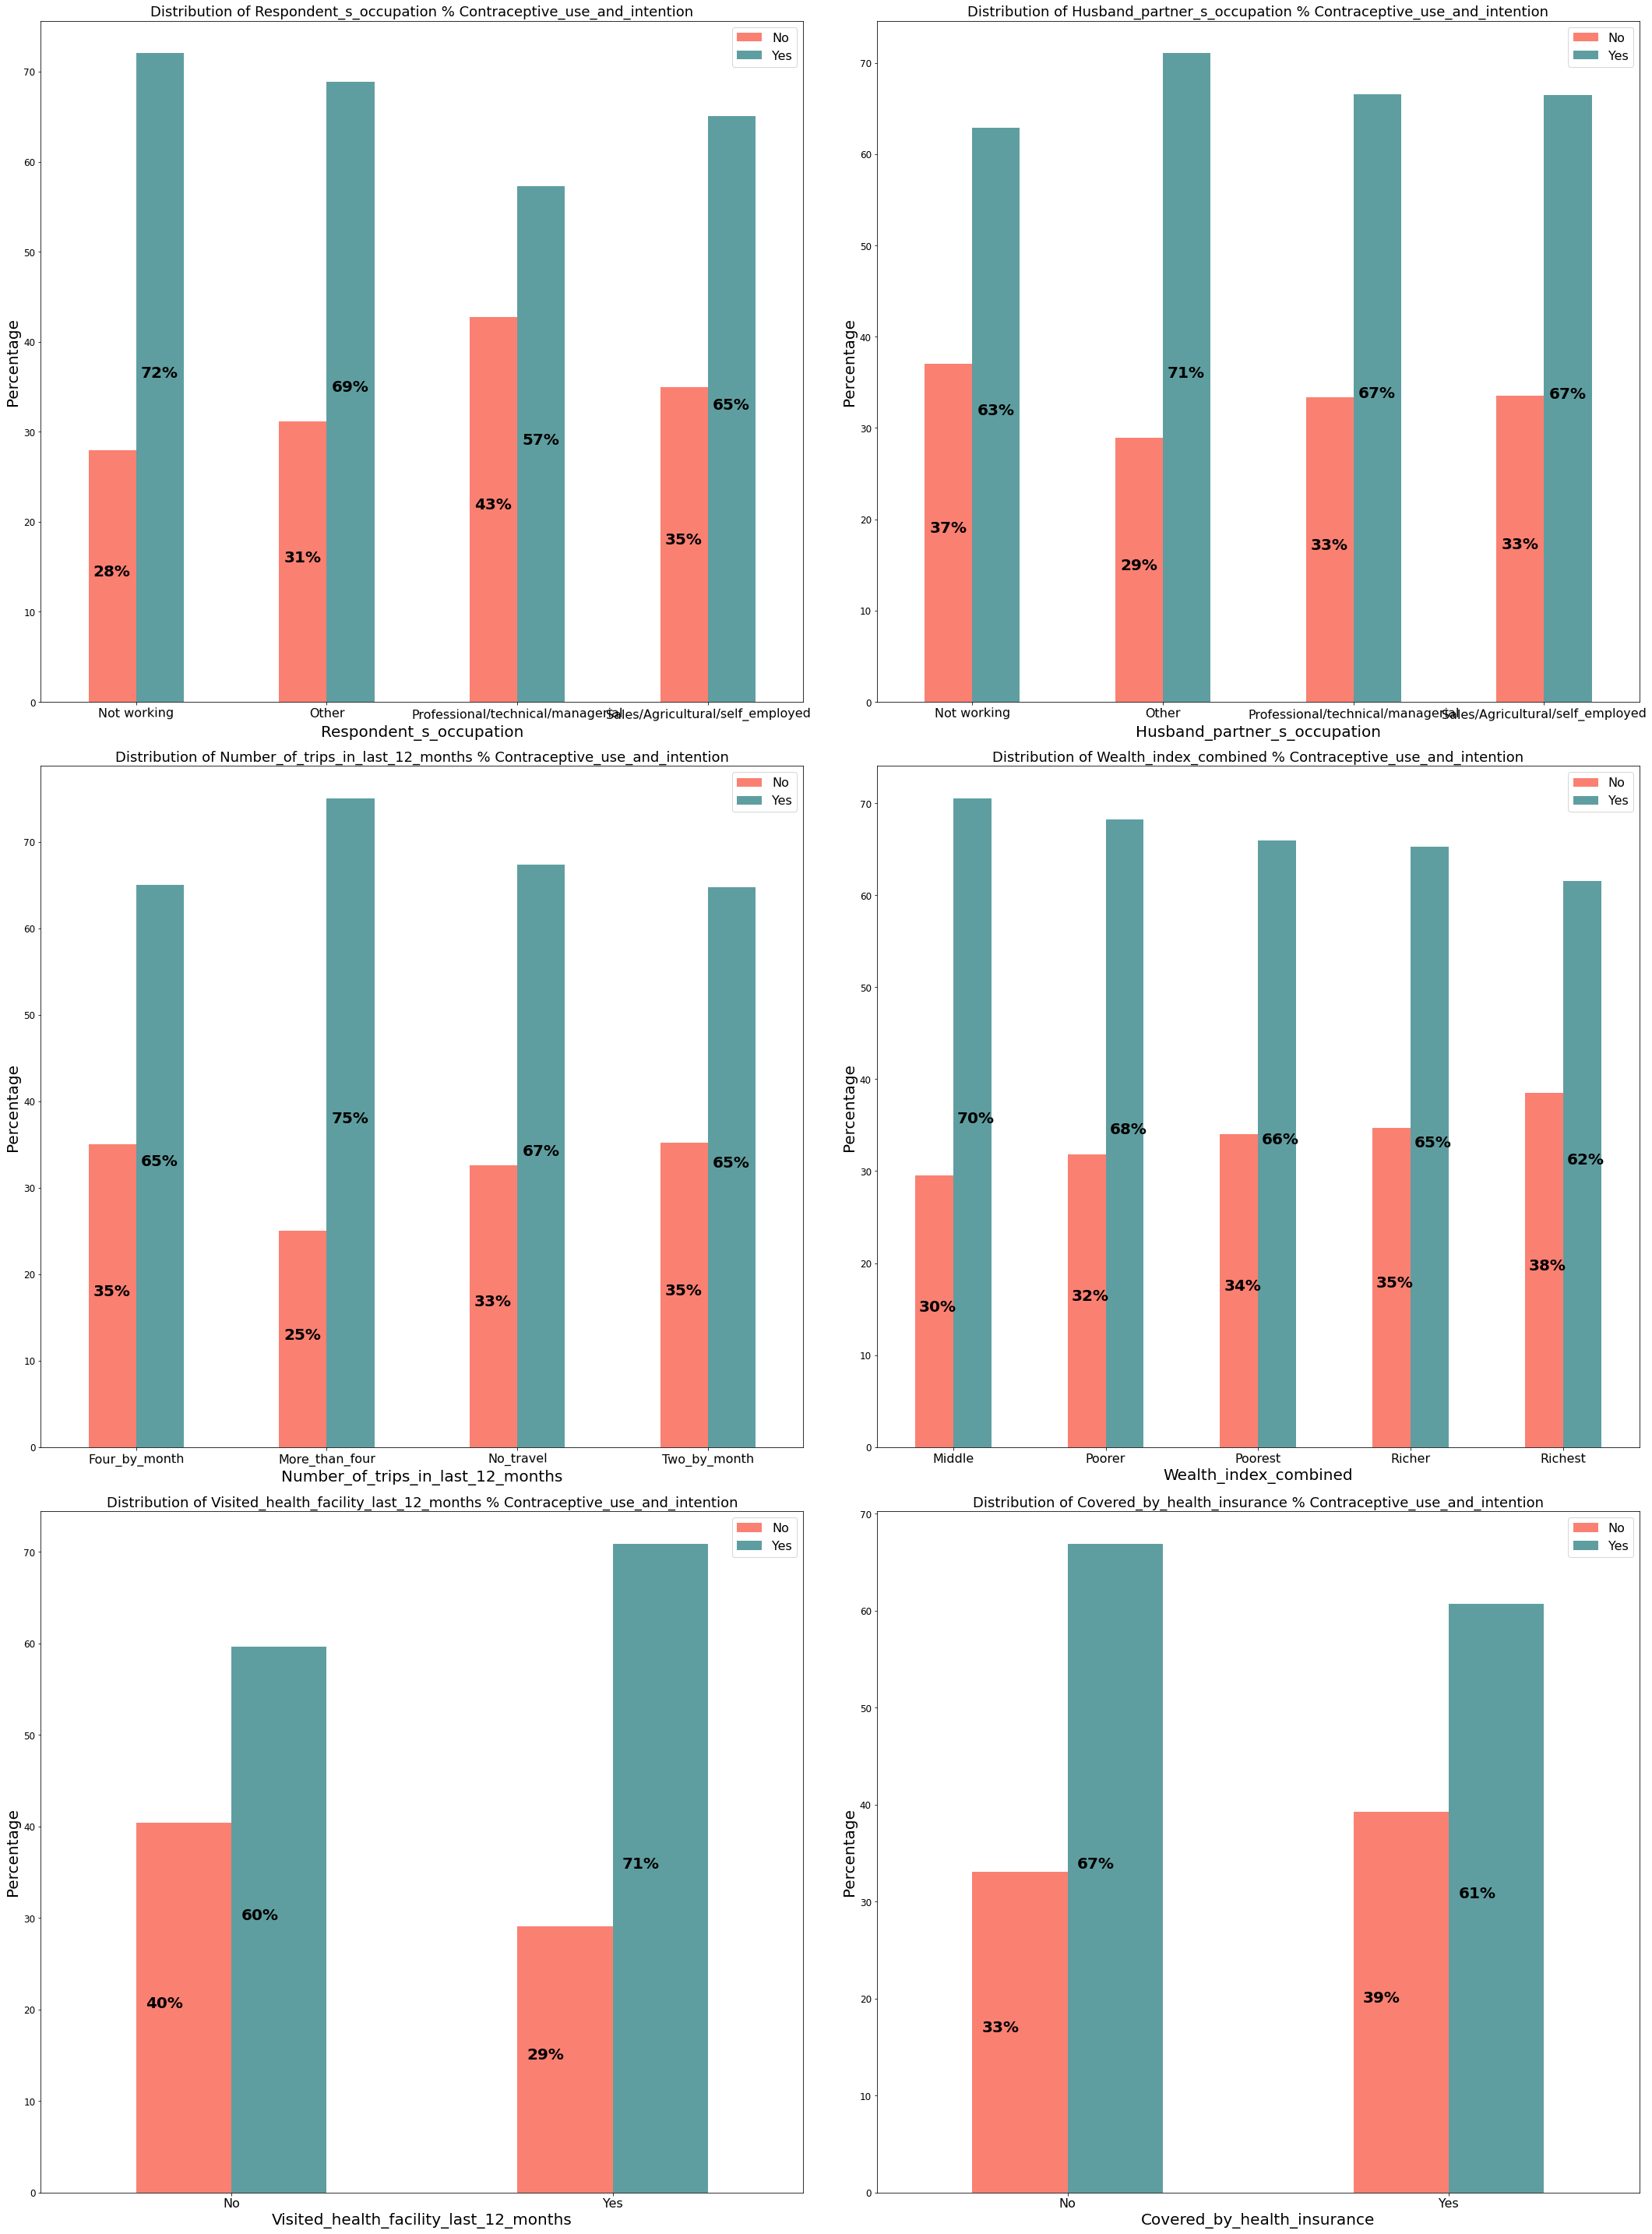

In [335]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (30,40))

for i,feature in enumerate(economic_factors):
    if i < 3:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 3 and i < 8:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-3,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

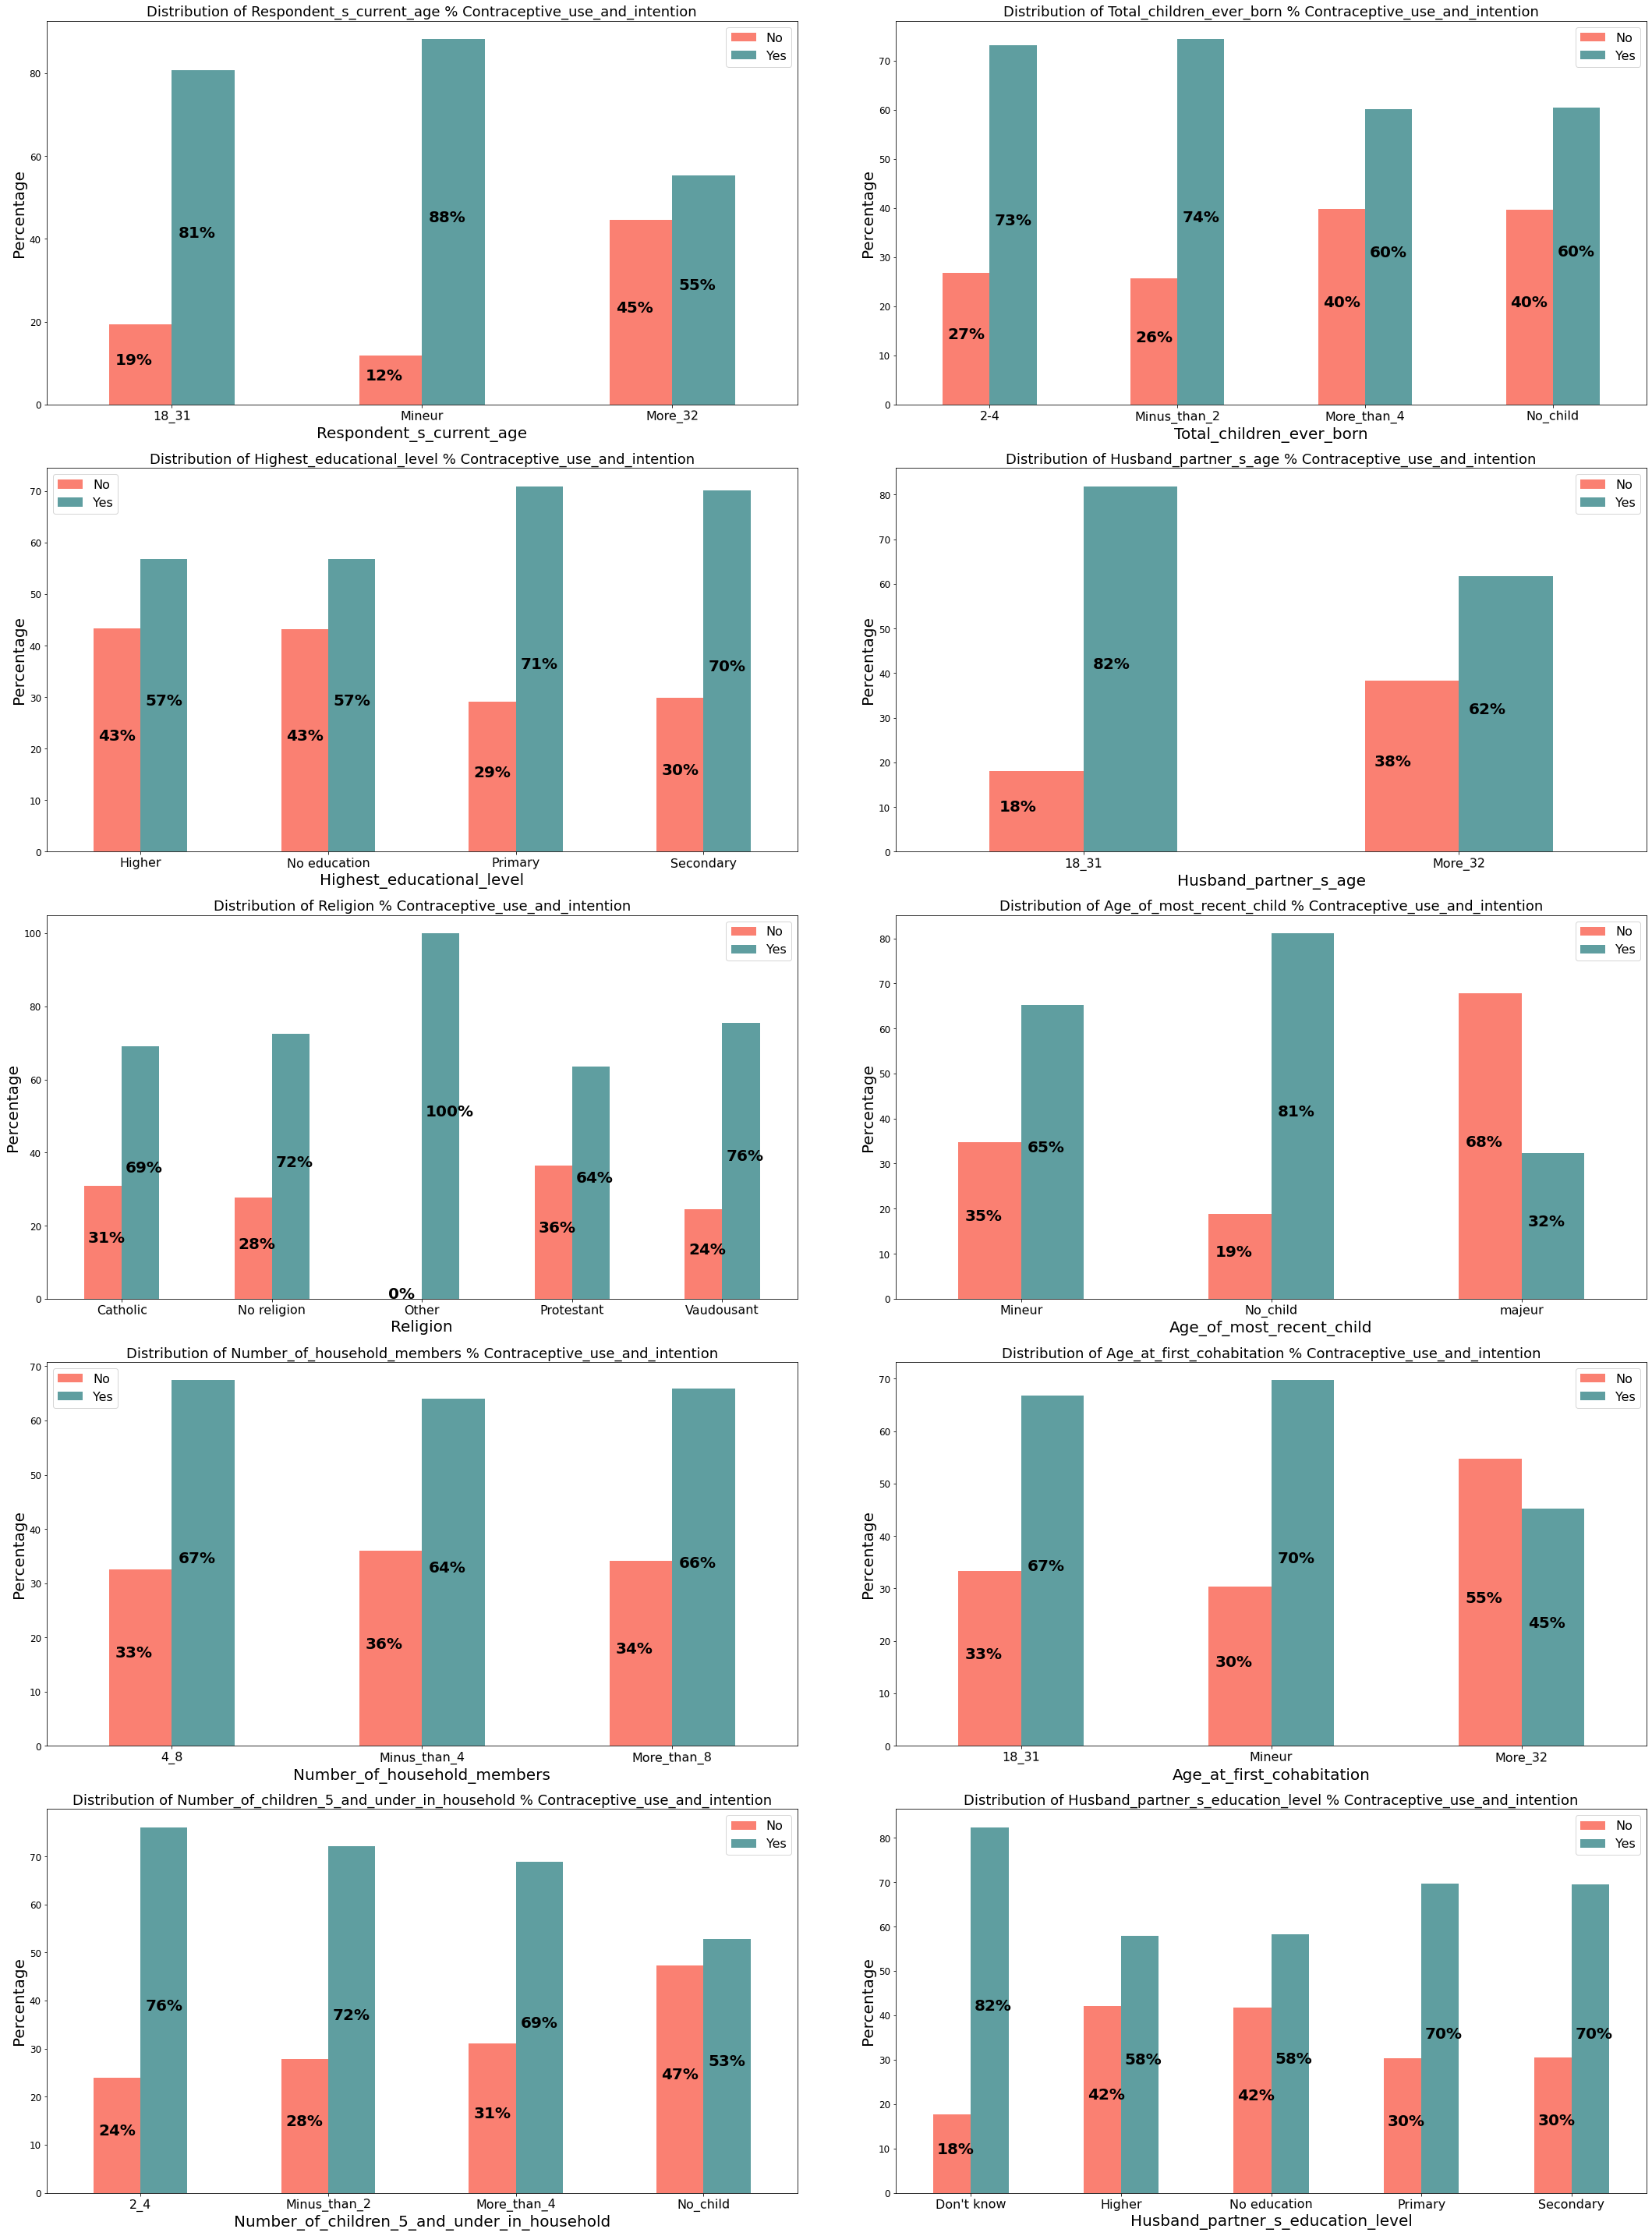

In [336]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (30,40))

for i,feature in enumerate(sociodemographic):
    if i < 5:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 5 and i < 10:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-5,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

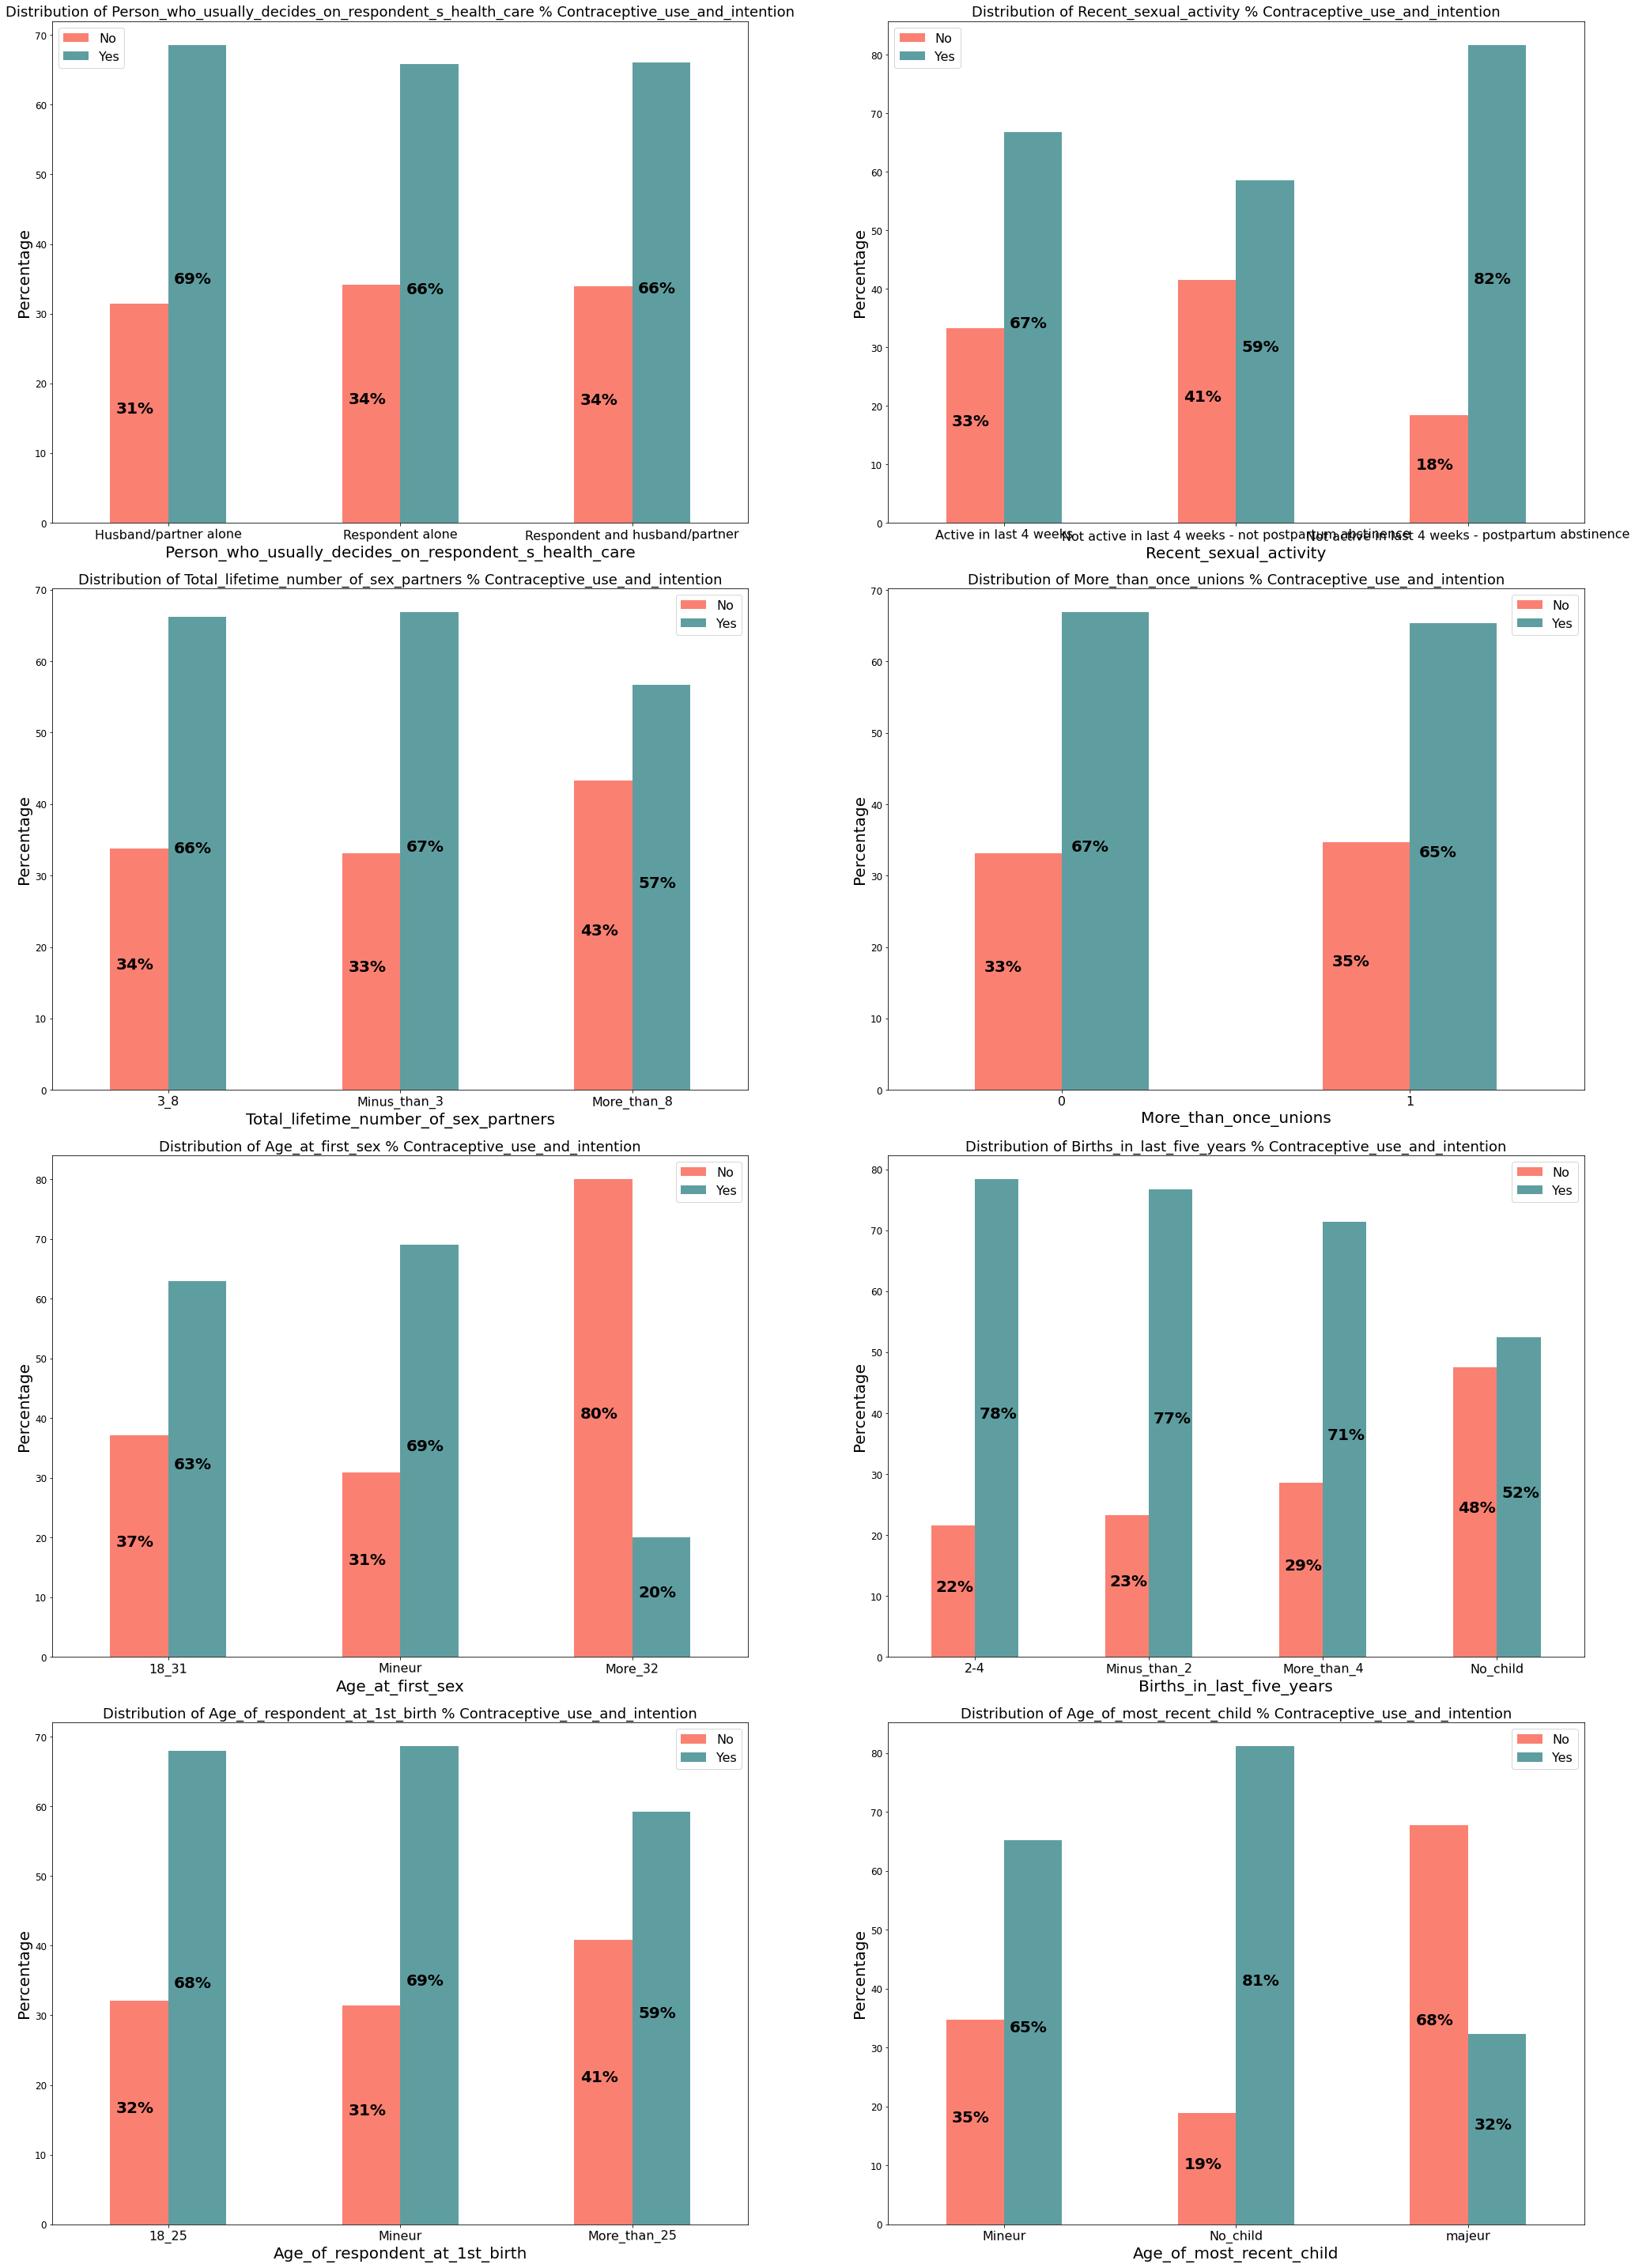

In [337]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (30,40))

for i,feature in enumerate(reproductive_factors):
    if i < 4:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 4 and i < 8:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-4,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

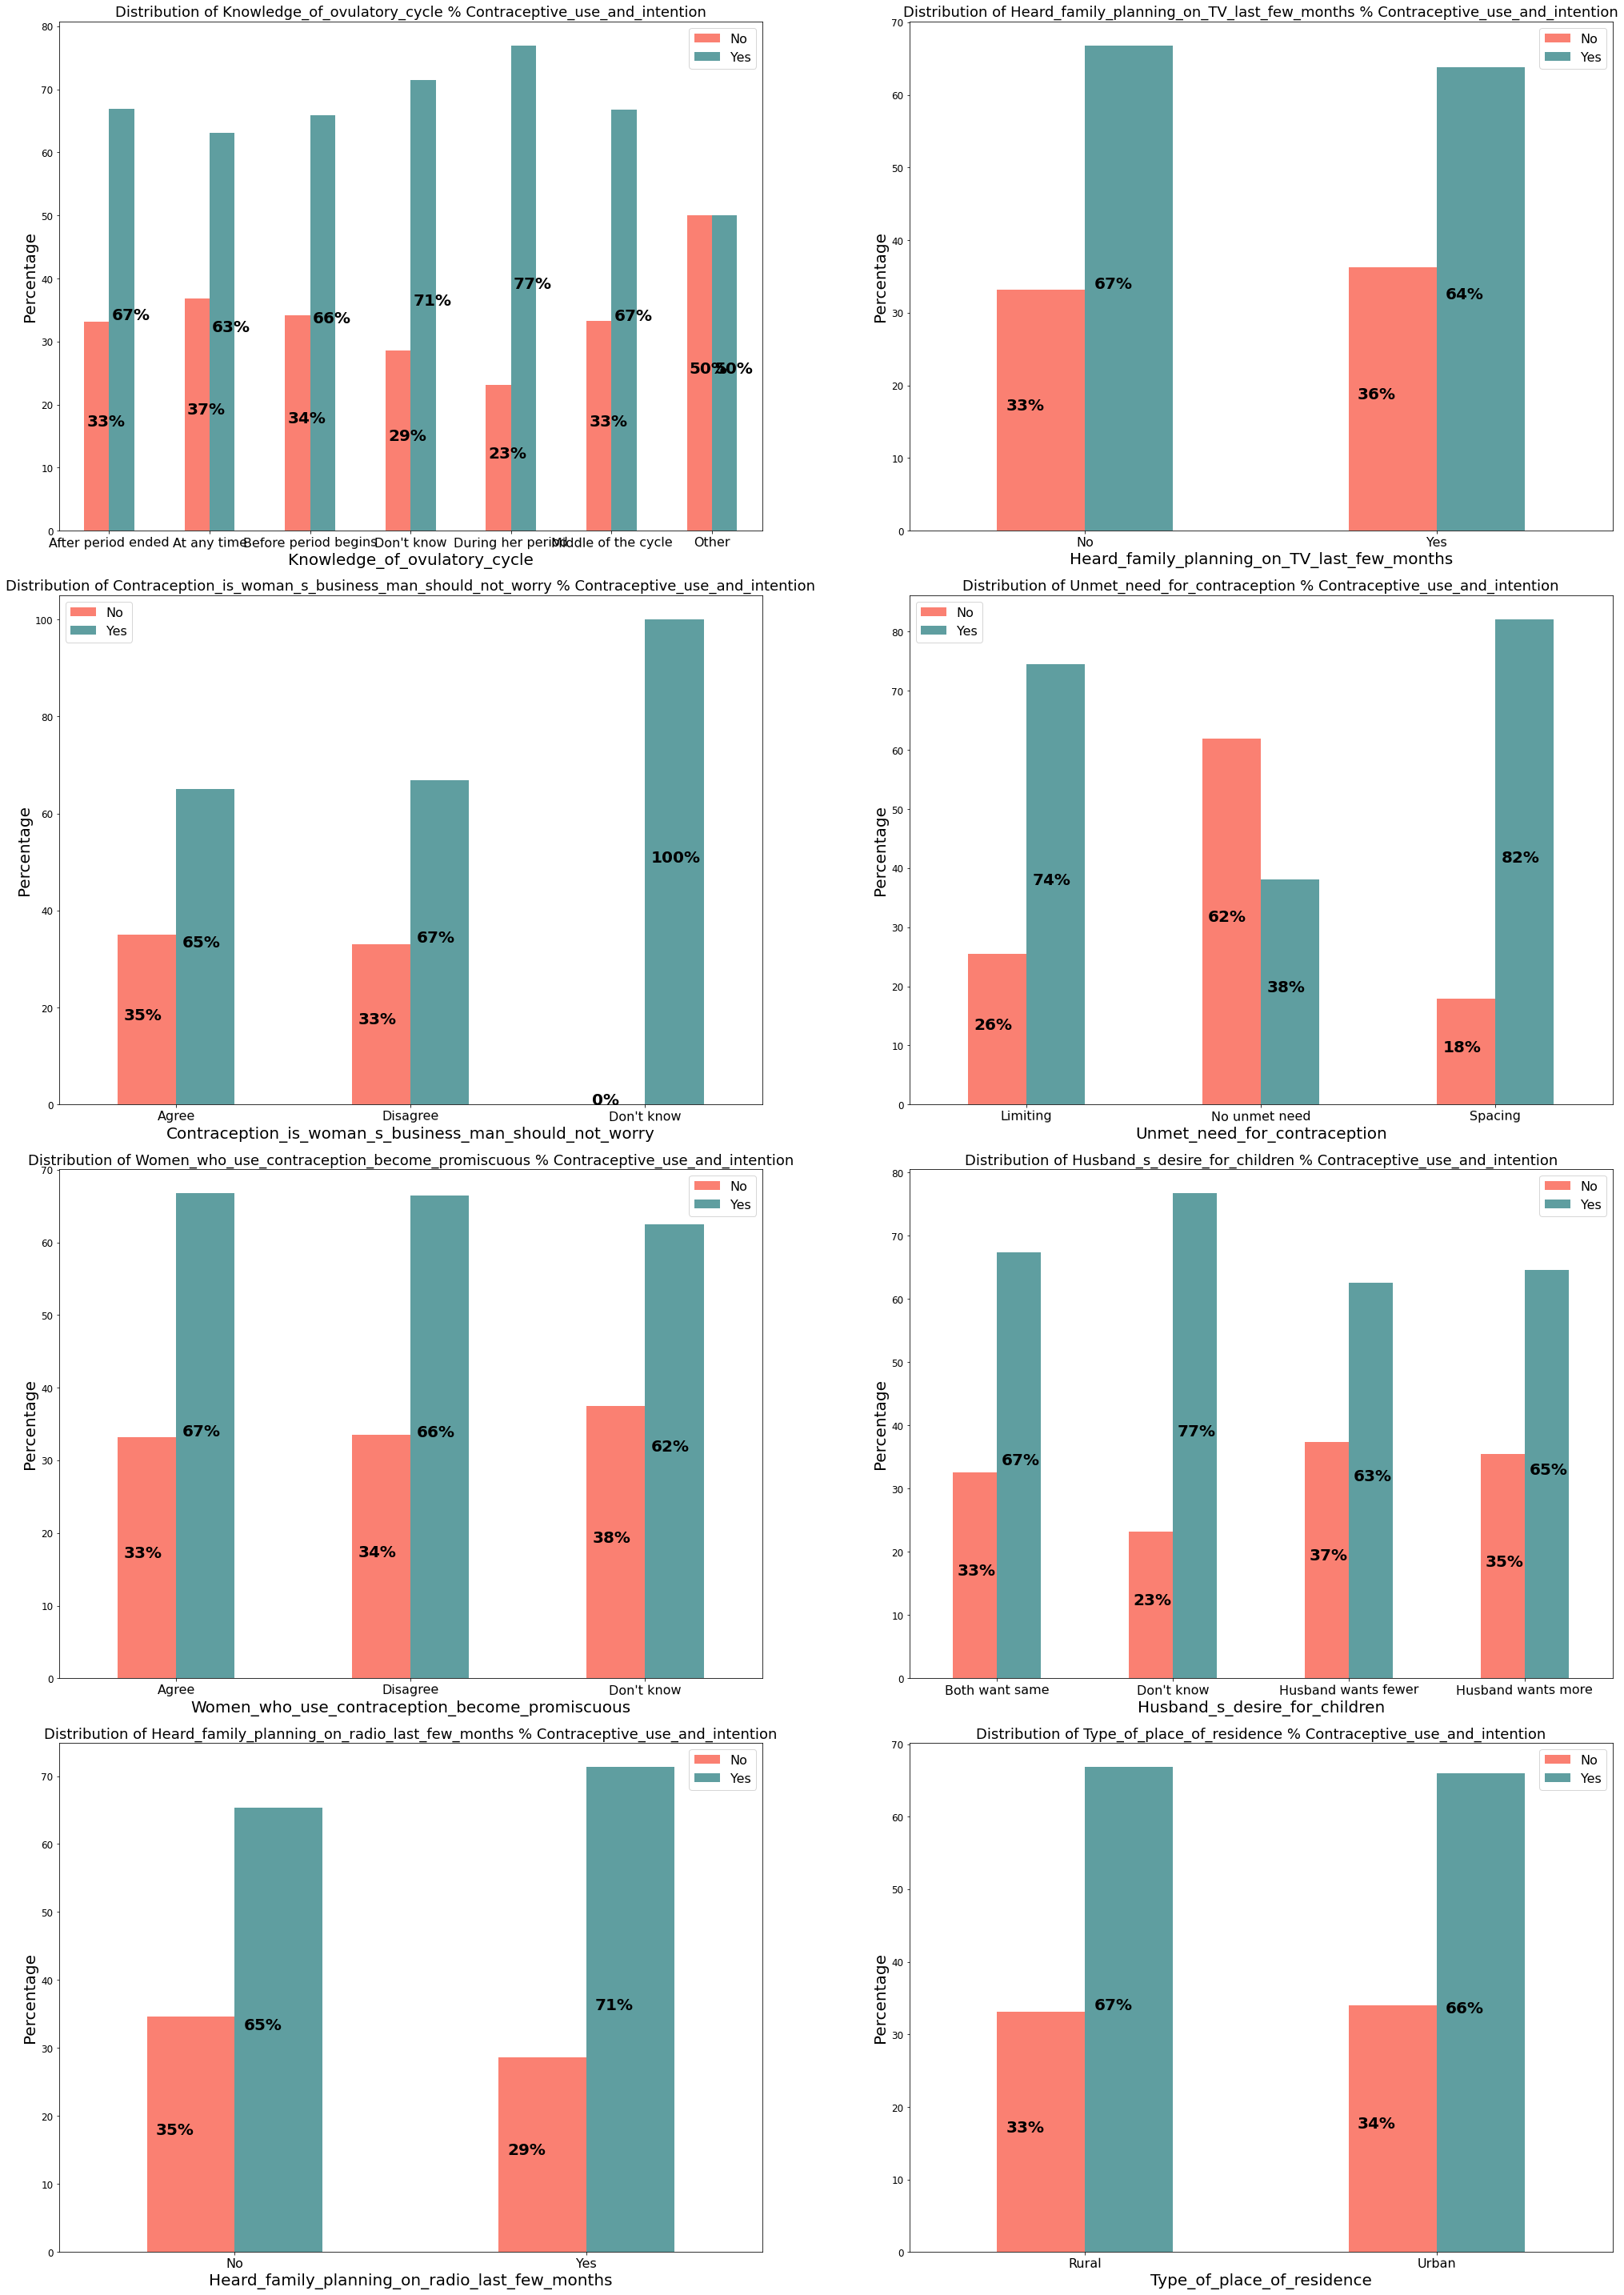

In [338]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (30,40))

for i,feature in enumerate(planning_factors):
    if i < 4:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 4 and i < 8:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-4,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

In [339]:
unmet=pd.get_dummies(unmet)
unmet.head()

,More_than_once_unions,Respondent_s_current_age_18_31,Respondent_s_current_age_Mineur,Respondent_s_current_age_More_32,Region_Aire Metropolitaine,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Rural,Type_of_place_of_residence_Urban,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Number_of_household_members_4_8,Number_of_household_members_Minus_than_4,Number_of_household_members_More_than_8,Number_of_children_5_and_under_in_household_2_4,Number_of_children_5_and_under_in_household_Minus_than_2,Number_of_children_5_and_under_in_household_More_than_4,Number_of_children_5_and_under_in_household_No_child,Number_of_trips_in_last_12_months_Four_by_month,Number_of_trips_in_last_12_months_More_than_four,Number_of_trips_in_last_12_months_No_travel,Number_of_trips_in_last_12_months_Two_by_month,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Births_in_last_five_years_2-4,Births_in_last_five_years_Minus_than_2,Births_in_last_five_years_More_than_4,Births_in_last_five_years_No_child,Age_of_respondent_at_1st_birth_18_25,Age_of_respondent_at_1st_birth_Mineur,Age_of_respondent_at_1st_birth_More_than_25,Knowledge_of_ovulatory_cycle_After period ended,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_Don't know,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Knowledge_of_ovulatory_cycle_Other,Total_children_ever_born_2-4,Total_children_ever_born_Minus_than_2,Total_children_ever_born_More_than_4,Total_children_ever_born_No_child,Age_of_most_recent_child_Mineur,Age_of_most_recent_child_No_child,Age_of_most_recent_child_majeur,Heard_family_planning_on_radio_last_few_months_No,Heard_family_planning_on_radio_last_few_months_Yes,Heard_family_planning_on_TV_last_few_months_No,Heard_family_planning_on_TV_last_few_months_Yes,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Contraception_is_woman_s_business_man_should_not_worry_Agree,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Contraception_is_woman_s_business_man_should_not_worry_Don't know,Women_who_use_contraception_become_promiscuous_Agree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_No,Covered_by_health_insurance_Yes,Age_at_first_cohabitation_18_31,Age_at_first_cohabitation_Mineur,Age_at_first_cohabitation_More_32,Age_at_first_sex_18_31,Age_at_first_sex_Mineur,Age_at_first_sex_More_32,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Husband_s_desire_for_children_Both want same,Husband_s_desire_for_children_Don't know,Husband_s_desire_for_children_Husband wants fewer,Husband_s_desire_for_children_Husband wants more,Unmet_need_for_contraception_Limiting,Unmet_need_for_contraception_No unmet need,Unmet_need_for_contraception_Spacing,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Not working,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales/Agricultural/self_employed,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_

In [340]:
# Descriptive Analysis of numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

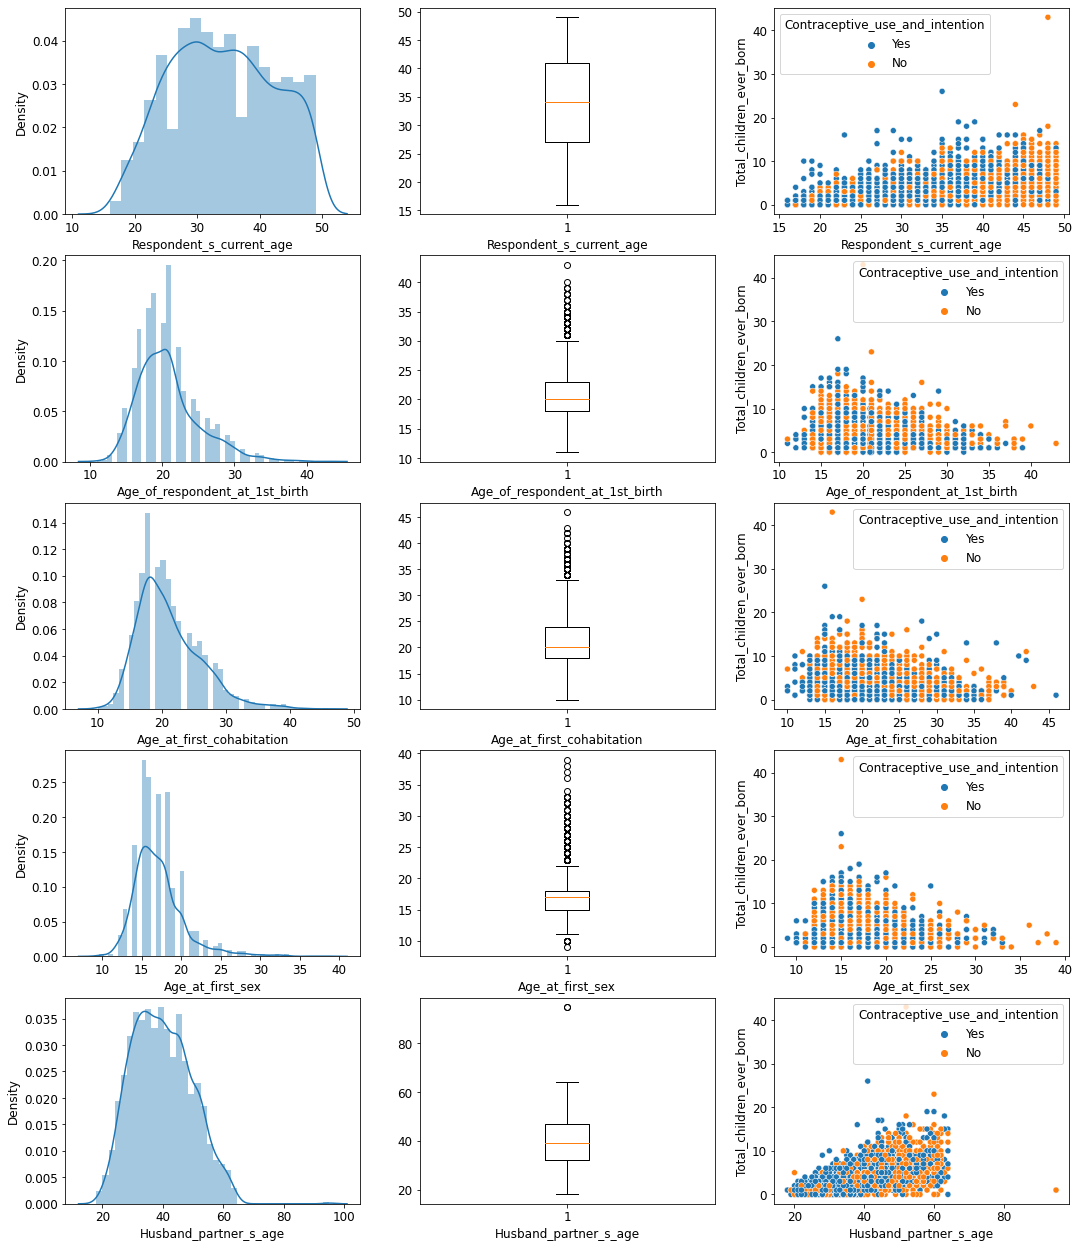

In [341]:
#  Numerical Data
con = ['Respondent_s_current_age',
 'Age_of_respondent_at_1st_birth',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Contraceptive_use_and_intention')
    c = c + 1

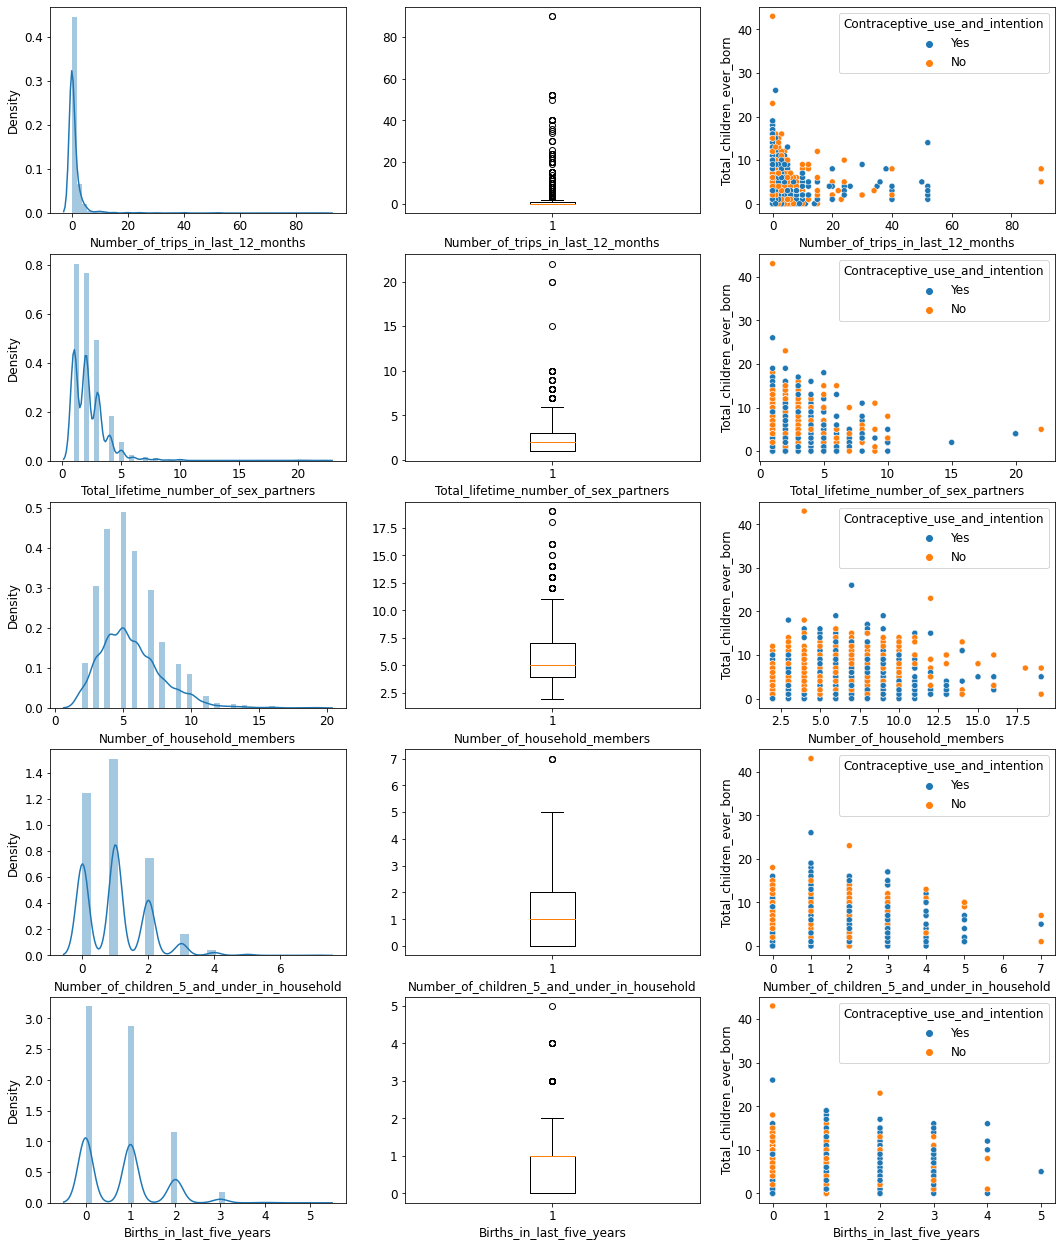

In [342]:
#  Numerical Data
con = ['Number_of_trips_in_last_12_months',
 'Total_lifetime_number_of_sex_partners',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Contraceptive_use_and_intention')
    c = c + 1

Text(0.5, 1.0, 'Correlation HeatMap')

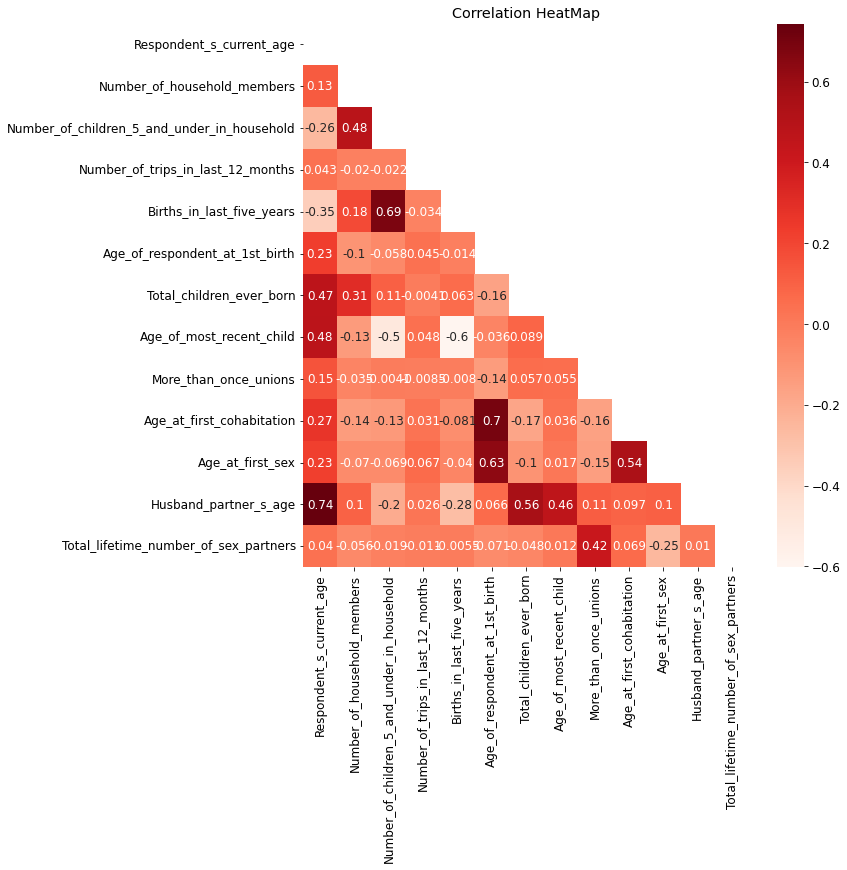

In [343]:
# creating mask
mask = np.triu(np.ones_like(df[num_cols].corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

**CORRELATION MATRIX**

## **ANALYSIS**

* **The correlation matrix shows that there is :**
    * **high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)**

    * **high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)**

    * **high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)**

    * **A correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)**

* **These correlations means they could have an identical impact on target variable;**

    * **We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;**

##**ANALYZE**

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [345]:
def factor(data='data'):

  vif_data = pd.DataFrame() 
  vif_data["feature"] = data.columns 
  
  vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                          for i in range(len(data.columns))] 
  
  return vif_data.query('VIF >= 5')

In [346]:
factor=factor(unmet)
factor

,feature,VIF
1,Respondent_s_current_age_18_31,7.46
3,Respondent_s_current_age_More_32,7.53
4,Region_Aire Metropolitaine,inf
5,Region_Artibonite,inf
6,Region_Centre,inf
...,...,...
111,Total_lifetime_number_of_sex_partners_3_8,inf
112,Total_lifetime_number_of_sex_partners_Minus_th...,inf
113,Total_lifetime_number_of_sex_partners_More_than_8,inf
114,Contraceptive_use_and_intention_No,inf


In [347]:
faclist=factor['feature'].tolist()
faclist

['Respondent_s_current_age_18_31',
 'Respondent_s_current_age_More_32',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_4_8',
 'Number_of_household_members_Minus_than_4',
 'Number_of_household_members_More_than_8',
 'Number_of_children_5_and_under_in_household_2_4',
 'Number_of_children_5_and_under_in_household_Minus_than_2',
 'Number_of_children_5_and_under_in_household_More_than_4',
 'Number_of_children_5_and_under_in_household_No_child',
 '

In [348]:
list_to_drop = ['Respondent_s_current_age_18_31',
 'Respondent_s_current_age_More_32',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_4_8',
 'Number_of_household_members_Minus_than_4',
 'Number_of_household_members_More_than_8',
 'Number_of_children_5_and_under_in_household_2_4',
 'Number_of_children_5_and_under_in_household_Minus_than_2',
 'Number_of_children_5_and_under_in_household_More_than_4',
 'Number_of_children_5_and_under_in_household_No_child',
 'Number_of_trips_in_last_12_months_Four_by_month',
 'Number_of_trips_in_last_12_months_More_than_four',
 'Number_of_trips_in_last_12_months_No_travel',
 'Number_of_trips_in_last_12_months_Two_by_month',
 'Wealth_index_combined_Middle',
 'Wealth_index_combined_Poorer',
 'Wealth_index_combined_Poorest',
 'Wealth_index_combined_Richer',
 'Wealth_index_combined_Richest',
 'Births_in_last_five_years_2-4',
 'Births_in_last_five_years_Minus_than_2',
 'Births_in_last_five_years_More_than_4',
 'Births_in_last_five_years_No_child',
 'Age_of_respondent_at_1st_birth_18_25',
 'Age_of_respondent_at_1st_birth_Mineur',
 'Age_of_respondent_at_1st_birth_More_than_25',
 'Knowledge_of_ovulatory_cycle_After period ended',
 'Knowledge_of_ovulatory_cycle_At any time',
 'Knowledge_of_ovulatory_cycle_Before period begins',
 "Knowledge_of_ovulatory_cycle_Don't know",
 'Knowledge_of_ovulatory_cycle_During her period',
 'Knowledge_of_ovulatory_cycle_Middle of the cycle',
 'Knowledge_of_ovulatory_cycle_Other',
 'Total_children_ever_born_2-4',
 'Total_children_ever_born_Minus_than_2',
 'Total_children_ever_born_More_than_4',
 'Total_children_ever_born_No_child',
 'Age_of_most_recent_child_Mineur',
 'Age_of_most_recent_child_No_child',
 'Age_of_most_recent_child_majeur',
 'Heard_family_planning_on_radio_last_few_months_No',
 'Heard_family_planning_on_radio_last_few_months_Yes',
 'Heard_family_planning_on_TV_last_few_months_No',
 'Heard_family_planning_on_TV_last_few_months_Yes',
 'Visited_health_facility_last_12_months_No',
 'Visited_health_facility_last_12_months_Yes',
 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
 'Contraception_is_woman_s_business_man_should_not_worry_Disagree',
 "Contraception_is_woman_s_business_man_should_not_worry_Don't know",
 'Women_who_use_contraception_become_promiscuous_Agree',
 'Women_who_use_contraception_become_promiscuous_Disagree',
 "Women_who_use_contraception_become_promiscuous_Don't know",
 'Covered_by_health_insurance_No',
 'Covered_by_health_insurance_Yes',
 'Age_at_first_cohabitation_18_31',
 'Age_at_first_cohabitation_Mineur',
 'Age_at_first_sex_18_31',
 'Age_at_first_sex_Mineur',
 'Recent_sexual_activity_Active in last 4 weeks',
 'Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence',
 'Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence',
 'Husband_s_desire_for_children_Both want same',
 "Husband_s_desire_for_children_Don't know",
 'Husband_s_desire_for_children_Husband wants fewer',
 'Husband_s_desire_for_children_Husband wants more',
 'Unmet_need_for_contraception_Limiting',
 'Unmet_need_for_contraception_No unmet need',
 'Unmet_need_for_contraception_Spacing',
 "Husband_partner_s_education_level_Don't know",
 'Husband_partner_s_education_level_Higher',
 'Husband_partner_s_education_level_No education',
 'Husband_partner_s_education_level_Primary',
 'Husband_partner_s_education_level_Secondary',
 'Husband_partner_s_occupation_Not working',
 'Husband_partner_s_occupation_Other',
 'Husband_partner_s_occupation_Professional/technical/managerial',
 'Husband_partner_s_occupation_Sales/Agricultural/self_employed',
 'Respondent_s_occupation_Not working',
 'Respondent_s_occupation_Other',
 'Respondent_s_occupation_Professional/technical/managerial',
 'Respondent_s_occupation_Sales/Agricultural/self_employed',
 'Husband_partner_s_age_More_32',
 'Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent and husband/partner',
 'Total_lifetime_number_of_sex_partners_3_8',
 'Total_lifetime_number_of_sex_partners_Minus_than_3',
 'Total_lifetime_number_of_sex_partners_More_than_8',
 'Contraceptive_use_and_intention_No']

In [349]:
unmet.head()

,More_than_once_unions,Respondent_s_current_age_18_31,Respondent_s_current_age_Mineur,Respondent_s_current_age_More_32,Region_Aire Metropolitaine,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Rural,Type_of_place_of_residence_Urban,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Number_of_household_members_4_8,Number_of_household_members_Minus_than_4,Number_of_household_members_More_than_8,Number_of_children_5_and_under_in_household_2_4,Number_of_children_5_and_under_in_household_Minus_than_2,Number_of_children_5_and_under_in_household_More_than_4,Number_of_children_5_and_under_in_household_No_child,Number_of_trips_in_last_12_months_Four_by_month,Number_of_trips_in_last_12_months_More_than_four,Number_of_trips_in_last_12_months_No_travel,Number_of_trips_in_last_12_months_Two_by_month,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Births_in_last_five_years_2-4,Births_in_last_five_years_Minus_than_2,Births_in_last_five_years_More_than_4,Births_in_last_five_years_No_child,Age_of_respondent_at_1st_birth_18_25,Age_of_respondent_at_1st_birth_Mineur,Age_of_respondent_at_1st_birth_More_than_25,Knowledge_of_ovulatory_cycle_After period ended,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_Don't know,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Knowledge_of_ovulatory_cycle_Other,Total_children_ever_born_2-4,Total_children_ever_born_Minus_than_2,Total_children_ever_born_More_than_4,Total_children_ever_born_No_child,Age_of_most_recent_child_Mineur,Age_of_most_recent_child_No_child,Age_of_most_recent_child_majeur,Heard_family_planning_on_radio_last_few_months_No,Heard_family_planning_on_radio_last_few_months_Yes,Heard_family_planning_on_TV_last_few_months_No,Heard_family_planning_on_TV_last_few_months_Yes,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Contraception_is_woman_s_business_man_should_not_worry_Agree,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Contraception_is_woman_s_business_man_should_not_worry_Don't know,Women_who_use_contraception_become_promiscuous_Agree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_No,Covered_by_health_insurance_Yes,Age_at_first_cohabitation_18_31,Age_at_first_cohabitation_Mineur,Age_at_first_cohabitation_More_32,Age_at_first_sex_18_31,Age_at_first_sex_Mineur,Age_at_first_sex_More_32,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Husband_s_desire_for_children_Both want same,Husband_s_desire_for_children_Don't know,Husband_s_desire_for_children_Husband wants fewer,Husband_s_desire_for_children_Husband wants more,Unmet_need_for_contraception_Limiting,Unmet_need_for_contraception_No unmet need,Unmet_need_for_contraception_Spacing,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Not working,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales/Agricultural/self_employed,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_

In [350]:
df.to_excel('getdummiesfile.xlsx')

In [351]:
unmet = unmet.drop(list_to_drop, axis=1)

In [352]:
df=df[['Respondent_s_current_age','Age_at_first_cohabitation', 'More_than_once_unions', 'Age_at_first_sex', 'Husband_partner_s_age', 'Contraceptive_use_and_intention']]
df.head()

,Respondent_s_current_age,Age_at_first_cohabitation,More_than_once_unions,Age_at_first_sex,Husband_partner_s_age,Contraceptive_use_and_intention
0,31,27,0,15,31,Yes
1,38,29,0,18,39,Yes
2,38,28,0,24,36,Yes
3,35,22,0,18,42,Yes
4,37,18,0,17,53,Yes


In [353]:
df.to_excel('finalfile.xlsx')

In [354]:
df=pd.get_dummies(df)
df.head()

,Respondent_s_current_age,Age_at_first_cohabitation,More_than_once_unions,Age_at_first_sex,Husband_partner_s_age,Contraceptive_use_and_intention_No,Contraceptive_use_and_intention_Yes
0,31,27,0,15,31,0,1
1,38,29,0,18,39,0,1
2,38,28,0,24,36,0,1
3,35,22,0,18,42,0,1
4,37,18,0,17,53,0,1


In [355]:
df.to_excel('learningfile.xlsx')

In [356]:
# drop Contraceptive_use_and_intention_No
df = df.drop('Contraceptive_use_and_intention_No', axis=1)

In [357]:
# Features and target
X = df.drop('Contraceptive_use_and_intention_Yes', axis=1) # features
y = df['Contraceptive_use_and_intention_Yes'] # target

In [358]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 8.069436
         Iterations 5
                                    Logit Regression Results                                   
Dep. Variable:     Contraceptive_use_and_intention_Yes   No. Observations:                 3033
Model:                                           Logit   Df Residuals:                     3028
Method:                                            MLE   Df Model:                            4
Date:                                 Sat, 25 Sep 2021   Pseudo R-squ.:                     inf
Time:                                         16:17:34   Log-Likelihood:                -24475.
converged:                                        True   LL-Null:                        0.0000
Covariance Type:                             nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

##**BUILDING MODEL II**

##**SPLIT THE DATA**

In [359]:
# Features and target
X = df.drop('Contraceptive_use_and_intention_Yes', axis=1) # features
y = df['Contraceptive_use_and_intention_Yes'] # target

In [360]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (2123, 5) 
X_test: (910, 5) 
y_train: (2123,) 
y_test: (910,)


In [361]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('After OverSampling : the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling : the shape of train_y: {} \n'.format(y_train_smote.shape))
 
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 1399
Before OverSampling, counts of label '0': 724 

After OverSampling : the shape of train_X: (2798, 5)
After OverSampling : the shape of train_y: (2798,) 

After OverSampling : counts of label '1': 1399
After OverSampling : counts of label '0': 1399


In [362]:
seed=2
X_train_smote,X_test,y_train_smote,y_test = train_test_split(X,y,test_size =0.3,random_state=seed)

##**BUILDING MODEL I**

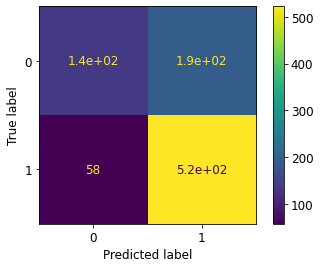

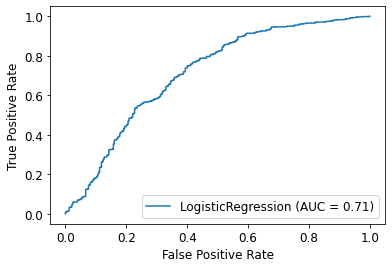

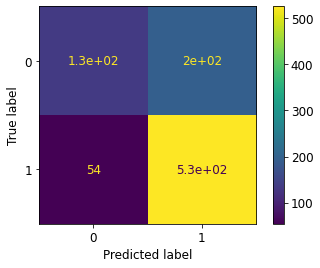

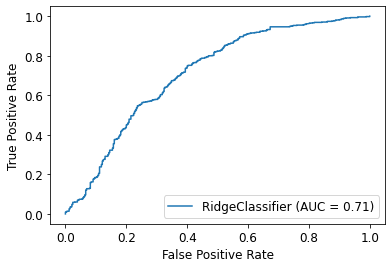

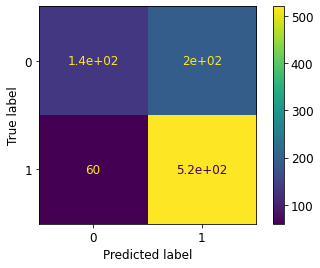

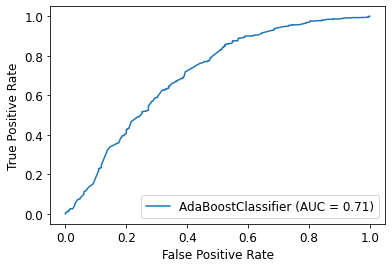

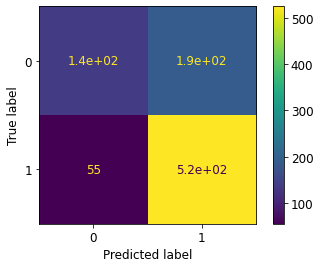

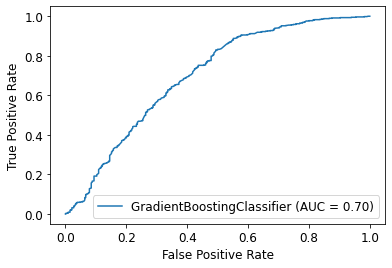

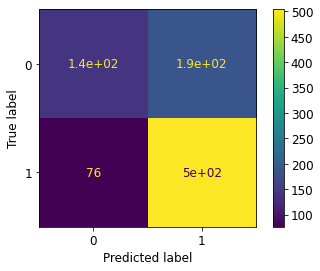

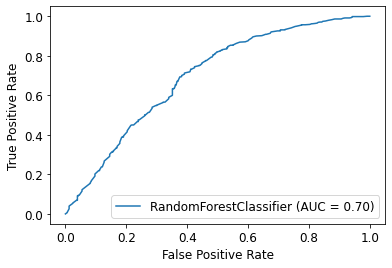

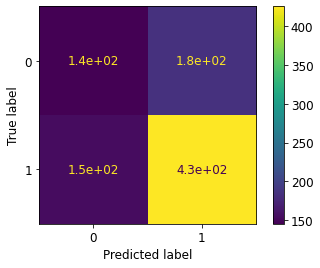

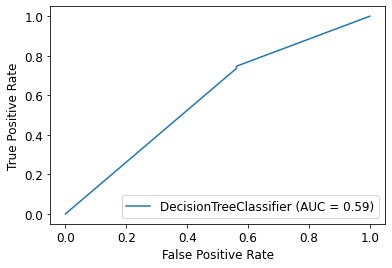

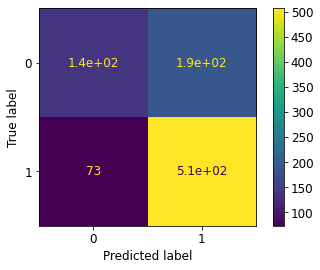

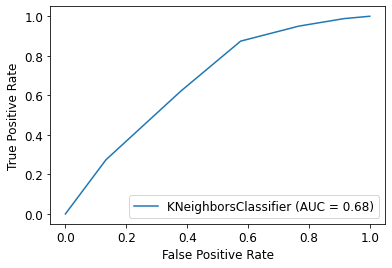

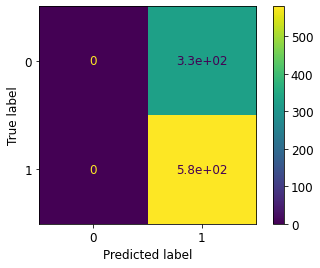

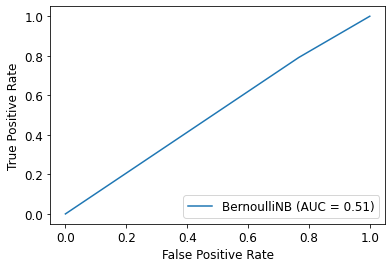

In [363]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train_smote,y_train_smote)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

unmethod = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [364]:
unmethod.sort_values(by='scores', ascending=False)

,names,scores,times
3,GradientBoostingClassifier,0.73,0.19
1,RidgeClassifier,0.73,0.00
0,LogisticRegression,0.72,0.04
2,AdaBoostClassifier,0.72,0.13
6,KNeighborsClassifier,0.71,0.00
4,RandomForestClassifier,0.71,0.33
7,NaiveBayes,0.64,0.00
5,DecisionTreeClassifier,0.63,0.01


###**Comment on classifiers**

##**ALGORITHM OF SELECTION II**

LR: 0.757345 
GBC: 0.755259 
KNN: 0.749658 
DTC: 0.725341 
RFC: 0.753388 
SVM: 0.746532 


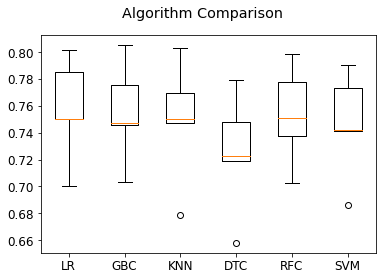

In [365]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# prepare configuration for cross validation test harness
seed = 2
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('GBC', GradientBoostingClassifier	()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##**Comment on Classifiers II**

##**ALGORITHM OF SELECTION III**

In [366]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [367]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score', ascending=False):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_range = [1, 2, 3, 4, 5, 6]
from sklearn.svm import SVC
LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()
models2 = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params2 = {
    'LogisticRegression': {},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]},
}

In [369]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X, y, scoring='accuracy', n_jobs=-1)

Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    5.0s finished


In [370]:
model = helper2.score_summary(sort_by='max_score')
model[['estimator','max_score']].head()

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
DecisionTreeClassifier


,estimator,max_score
266,DecisionTreeClassifier,0.75
260,DecisionTreeClassifier,0.75
269,DecisionTreeClassifier,0.75
268,DecisionTreeClassifier,0.75
251,DecisionTreeClassifier,0.75


##**Comment on classifiers III**

##**ALGORITH OF SELECTION IV**

In [371]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [372]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

In [373]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)

In [374]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search]
for pipe in grids:
    pipe.fit(X_train_smote,y_train_smote)

In [375]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.7230769230769231
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7197802197802198
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.7208791208791209
Random Forest Best Params: {'RF__max_depth': 4, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.6901098901098901
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}


##**comment on classifiers IV**

##**MODEL BUILDING**

####**LOGISTIC REGRESSION**

In [376]:
# Create Decision Tree classifer object
clf = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')

# Train Decision Tree Classifer
clf = clf.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7230769230769231


In [377]:
pd.DataFrame(np.concatenate([clf.intercept_.reshape(-1,1),
                             clf.coef_],axis=1),
             index = ["coef"],
             columns = ["constantes"]+list(X.columns)).T

,coef
constantes,4.72
Respondent_s_current_age,-0.09
Age_at_first_cohabitation,-0.01
More_than_once_unions,0.22
Age_at_first_sex,0.00
Husband_partner_s_age,-0.01


###**DECISION TREE CLASSIFIER**

In [378]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)

# Train Decision Tree Classifer
dt = dt.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.7197802197802198


In [379]:
feature_cols=['Respondent_s_current_age',
 'Age_at_first_cohabitation',
 'More_than_once_unions',
 'Age_at_first_sex',
 'Husband_partner_s_age']

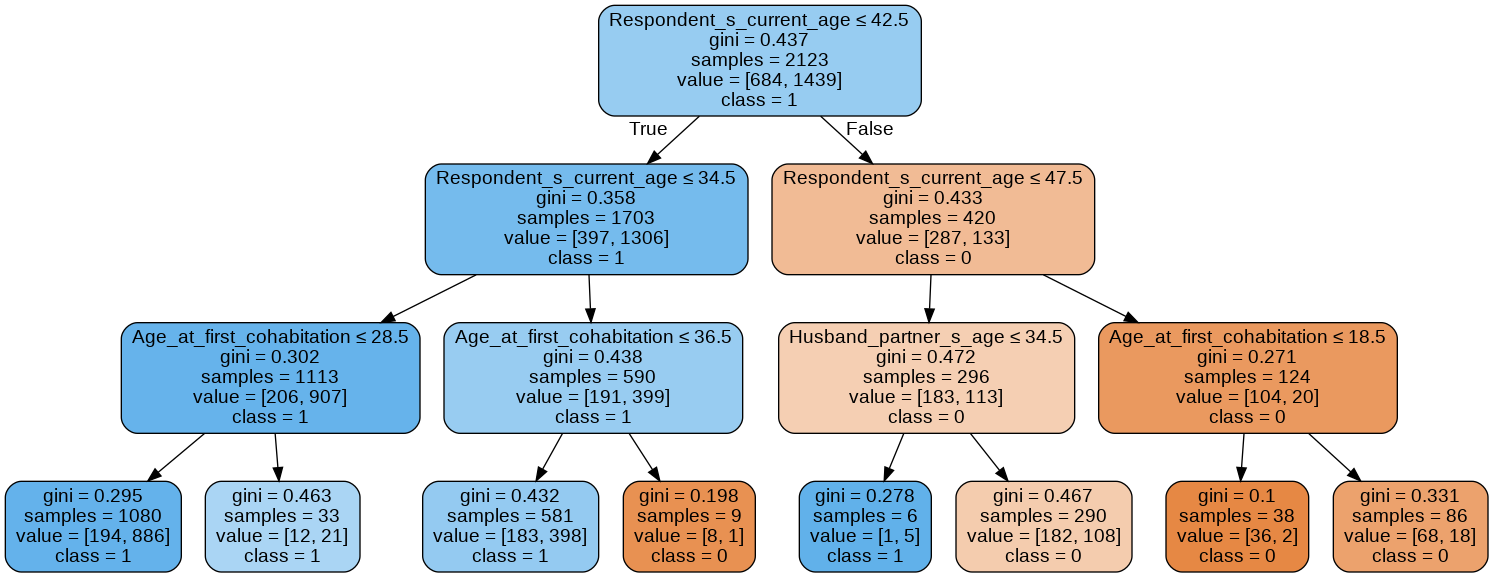

In [380]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())

In [381]:
def model_analysis(model='model', true_label='y_test',predicted='y_pred'): 
    '''
    return all metrics results
    '''
    print(f"accuracy :", round((metrics.accuracy_score(true_label, predicted)*100)),'%')
    print("f1 score macro :", round(metrics.f1_score(true_label, predicted, average='macro')*100),'%')    
    print("f1 score micro :", round(metrics.f1_score(true_label, predicted, average='micro')*100),'%')
    print("precision score :", round(metrics.precision_score(true_label, predicted, average='macro')*100),'%') 
    print("recall score :", round(metrics.recall_score(true_label, predicted, average='macro')*100),'%')
    print("hamming_loss :", round(metrics.hamming_loss(true_label, predicted)*100),'%')
    print("classification_report :\n")
    print(metrics.classification_report(true_label, predicted))
    print("jaccard_similarity_score :", round(metrics.jaccard_similarity_score(true_label, predicted)*100),'%')
    print("log_loss :", round(metrics.log_loss(true_label, predicted)))
    print("zero_one_loss :", round(metrics.zero_one_loss(true_label, predicted)*100),'%')
    print("AUC&ROC :", round(metrics.roc_auc_score(true_label, predicted)*100),'%')
    print("matthews_corrcoef :", round(metrics.matthews_corrcoef(true_label, predicted)*100),'%')
    print("confusion matrix")
    plot_confusion_matrix(model,X_test,y_test,cmap="YlGnBu")
    print("ROC and CURVE")
    plot_roc_curve(model,X_test,y_test)

accuracy : 72 %
f1 score macro : 66 %
f1 score micro : 72 %
precision score : 71 %
recall score : 65 %
hamming_loss : 28 %
classification_report :

              precision    recall  f1-score   support

           0       0.70      0.40      0.51       330
           1       0.72      0.90      0.80       580

    accuracy                           0.72       910
   macro avg       0.71      0.65      0.66       910
weighted avg       0.72      0.72      0.70       910

jaccard_similarity_score : 72 %
log_loss : 10
zero_one_loss : 28 %
AUC&ROC : 65 %
matthews_corrcoef : 36 %
confusion matrix
ROC and CURVE


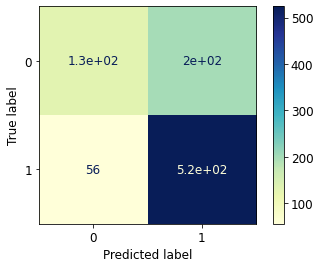

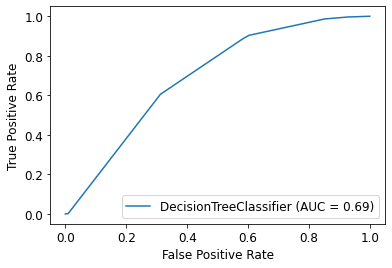

In [382]:
model_analysis(dt, y_test, y_pred_dt)

In [383]:
DT=[70, 63, 52, 47, 70, 71, 98, 82, 56, 7, 12]

accuracy : 72 %
f1 score macro : 66 %
f1 score micro : 72 %
precision score : 72 %
recall score : 66 %
hamming_loss : 28 %
classification_report :

              precision    recall  f1-score   support

           0       0.70      0.41      0.52       330
           1       0.73      0.90      0.81       580

    accuracy                           0.72       910
   macro avg       0.72      0.66      0.66       910
weighted avg       0.72      0.72      0.70       910

jaccard_similarity_score : 72 %
log_loss : 10
zero_one_loss : 28 %
AUC&ROC : 66 %
matthews_corrcoef : 37 %
confusion matrix
ROC and CURVE


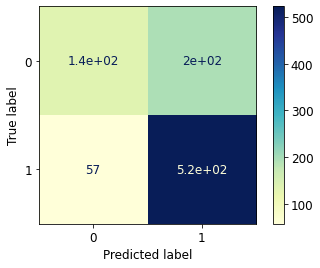

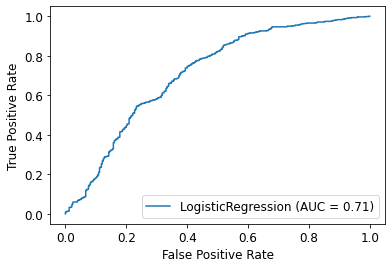

In [384]:
model_analysis(clf, y_test, y_pred)

In [385]:
LR=[70, 65, 52, 46, 72, 71, 98, 82, 60, 5, 10]

##**SYNTHETIC TABLE**

In [386]:
synthese = pd.DataFrame({'LR': LR,
                        'DT': DT,}, index=['accuracy', 'precision_score', 'recall_score','f1_macro', 'f1_micro', 'precision_0', 
                                        'recall_0', 'f1_score_0',
                                        'precision_1', 'recall_1', 
                                        'f1_score_1']).T

In [387]:
synthese

,accuracy,precision_score,recall_score,f1_macro,f1_micro,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1
LR,70,65,52,46,72,71,98,82,60,5,10
DT,70,63,52,47,70,71,98,82,56,7,12


##**CONCLUSION**

##**MODEL III**

##**DATA TRANSFORMATION**

In [388]:
multi_col = [col for col in df.columns if df[col].nunique()>2]
multi_col

['Respondent_s_current_age',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age']

In [389]:
df[multi_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,3033.00,34.14,8.33,16.00,27.00,34.00,41.00,49.00
Age_at_first_cohabitation,3033.00,21.09,4.93,10.00,18.00,20.00,24.00,46.00
Age_at_first_sex,3033.00,17.15,3.25,9.00,15.00,17.00,18.00,39.00
Husband_partner_s_age,3033.00,39.84,9.73,18.00,32.00,39.00,47.00,95.00


Text(0.5, 1.0, 'Correlation HeatMap')

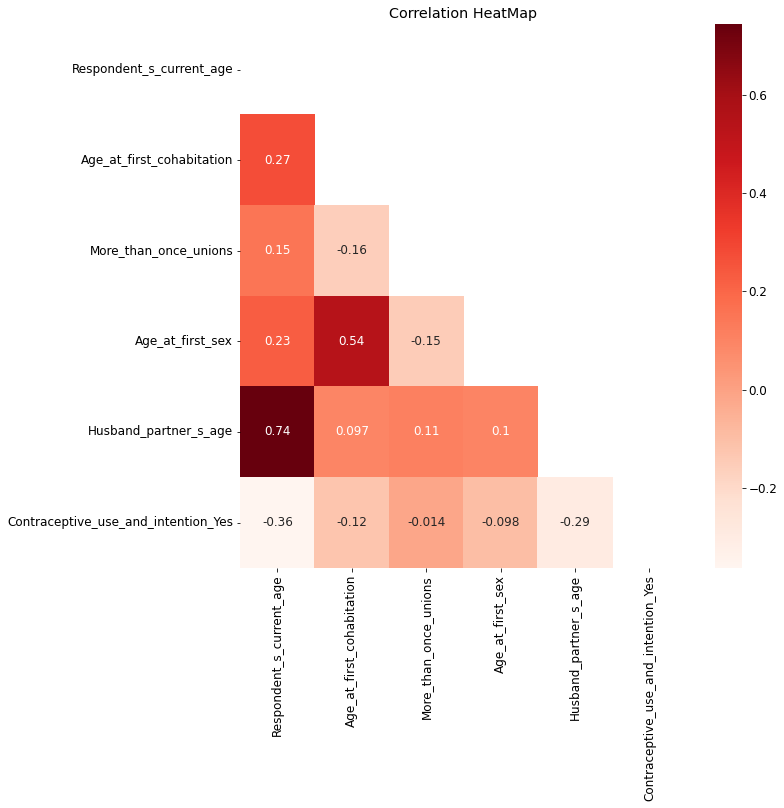

In [390]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

In [391]:
# Find the average values
df.groupby('Contraceptive_use_and_intention_Yes').mean().T

Contraceptive_use_and_intention_Yes,0,1
Respondent_s_current_age,38.40,32.00
Age_at_first_cohabitation,21.94,20.67
More_than_once_unions,0.23,0.21
Age_at_first_sex,17.60,16.92
Husband_partner_s_age,43.87,37.82


**INTERPRETATION FOR SELECTION 2**

* **In this second selection amoung classifiers, we set classifers at default parameter**

* **We can see the best model is GradientBoostingClassifier with 80% accuracy**

##**LOGISTIC REGRESSION CLASSIFIER**

In [392]:
param_grid = {'penalty':['l1','l2'],'C':[1,2,3,4,5], 'verbose':[1,2,3,4,5],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model=LogisticRegression()  
grid = GridSearchCV(model, param_grid, verbose = 2, n_jobs=-1, scoring = 'accuracy',
cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train_smote, y_train_smote) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_y_pred = grid.predict(X_test)
# model_analysis(y_test, grid_y_pred)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    7.9s


{'C': 2, 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 1}


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


#**RANDOM FOREST CLASSIFIER MODEL**

In [393]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
gdbclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
gdbclf.fit(X_train_smote,y_train_smote)

gdb_y_pred=gdbclf.predict(X_test)
# model_analysis(y_test, gdb_y_pred)

In [394]:
# Scale the data
from sklearn.preprocessing import StandardScaler
# Pipeline, Gridsearch, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import plot_confusion_matrix
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# from sklearn import svm

In [395]:
param_grid = {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}
model=DecisionTreeClassifier() 
grid = GridSearchCV(model, param_grid, verbose = 2, n_jobs=-1, scoring = 'accuracy',
cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train_smote, y_train_smote) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_dtc_y_pred = grid.predict(X_test) 

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    2.6s


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    6.8s finished


In [396]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [397]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

In [398]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='precision',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='precision',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='precision',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='precision',
        cv=3)

In [399]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search]
for pipe in grids:
    pipe.fit(X_train_smote,y_train_smote)

In [400]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.729050279329609
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7253814147018031
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.7270194986072424
Random Forest Best Params: {'RF__max_depth': 4, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.7331240188383046
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}


#**DECISION TREE CLASSIFIER MODEL**

In [401]:
# print report 
# model_analysis(y_test, gdb_y_pred)

In [402]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7318681318681318


In [403]:
# print report 
# model_analysis(y_test, grid_dtc_y_pred)

##**SELECTION 0**

In [404]:
# 1. Instantiate with min_samples_split = 50
dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)

# 2. Fit
dtc.fit(X_train_smote, y_train_smote)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(X_test)

# Accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.6142857142857143

In [405]:
# Import
#from sklearn.grid_search import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [406]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.706058995482328
{'min_samples_split': 48}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=48,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [407]:
# model_analysis(y_test, y_pred)

In [408]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
clf.predict(X_test)[0:15]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=uint8)

In [409]:
# print the first 40 predicted probabilities for class 1
predic_40=clf.predict_proba(X_test)
predic_40=pd.DataFrame(predic_40)
predic_40[predic_40[1]>0.50]

,0,1
1,0.19,0.81
2,0.28,0.72
6,0.19,0.81
7,0.28,0.72
8,0.19,0.81
...,...,...
905,0.28,0.72
906,0.19,0.81
907,0.19,0.81
908,0.35,0.65


In [410]:
prob_40_sup_50=predic_40[predic_40[1]>0.50].shape[0]/predic_40.shape[0]
prob_40_sup_50

0.756043956043956

In [411]:
# store the predicted probabilities for class 1
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [412]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

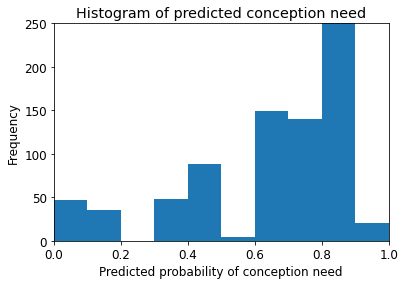

In [413]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.ylim(0,250)
plt.title('Histogram of predicted conception need')
plt.xlabel('Predicted probability of conception need')
plt.ylabel('Frequency')

##**INTERPRETATION**

* **Almost the majority of the observations have probability more than 0.8**

* **Small number of observations with probability < 0.5** : **This is below the threshold of 0.5**

* **Most of these woman would be predicted : "Yes, i need contraceptive method""**

In [414]:
# function to calculate cross-validated AUC
def precision(cv=None, scoring='scoring'):
  score = cross_val_score(clf, X_train_smote, y_train_smote, cv=cv, scoring=scoring).mean()
  return score

In [415]:
precision(cv=5, scoring='precision')

0.7618834989470349

In [416]:
precision(cv=5, scoring='accuracy')

0.7447125416204217

In [417]:
precision(cv=5, scoring='recall')

0.9068694347657761

In [418]:
df.columns

Index(['Respondent_s_current_age', 'Age_at_first_cohabitation', 'More_than_once_unions', 'Age_at_first_sex', 'Husband_partner_s_age',
       'Contraceptive_use_and_intention_Yes'],
      dtype='object')

In [419]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Yes', 'No', 'Yes', 'No'],
       ["18-31", "More-32", "18-31", "More-32"]],
  y = [82, 18, 62, 38],
  name = 'Yes',
))

fig.add_trace(go.Bar(
  x = [['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
       ["18-31", "More-32", "18-31", "More-32"]],
  y = [67, 33, 70, 38],
  name = 'No',
))

fig.update_layout(title_text="<b>Churn Distribution of unmet for contraception by husband ager</b>")

fig.show()

In [420]:
labels = df['Contraceptive_use_and_intention_Yes'].unique()
values = df['Contraceptive_use_and_intention_Yes'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>intention to use contraception</b>")
fig.show()

In [421]:
labels = df['More_than_once_unions'].unique()
values = df['More_than_once_unions'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>More_than_once_unions Distribution</b>")
fig.show()

* **Let's plot histogram for numeric variable**

#**CONCLUSION AND RECOMMANDATIONS**